<a href="https://colab.research.google.com/github/Sairam307/ML-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_ML_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

This project aimed to develop a machine learning classification model for accurate cardiovascular risk prediction. With cardiovascular diseases being a leading cause of mortality worldwide, the ability to identify individuals at high risk can greatly contribute to early intervention and personalized healthcare.

A comprehensive dataset consisting of patient records was utilized for the project. The dataset contained relevant features such as age, gender, blood pressure, cholesterol levels, smoking status, and medical history. Prior to analysis, preprocessing steps were performed, including data cleaning and feature normalization.

Several machine learning algorithms were explored for classification, including logistic regression, random forest, and support vector machines. Additionally, feature selection techniques were applied to identify the most informative features for risk prediction. Cross-validation and hyperparameter tuning were conducted to optimize model performance.

The classification models were evaluated using commonly used metrics such as accuracy, precision, recall, and F1 score. These metrics provided insights into the models' ability to correctly identify individuals at high risk of cardiovascular diseases, ensuring robust performance evaluation.

The evaluation results demonstrated that the Decision tree algorithm outperformed other models, achieving an accuracy of 85%, The model exhibited strong predictive capabilities in identifying patients with a high risk of cardiovascular diseases, enabling timely intervention and risk mitigation.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The Dataset is from an onfoing cardivascular study on residents of the town of framingham, massachusetts.The classification goal is to predict Whether the patient has a 10 year risk of future caronary heart disease(CHD).The dataset provides the patient's information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor, there are both demographic, behavioral, and medical factors**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [38]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set() 

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [3]:
#load Data
file_path = '/content/Drive/MyDrive/Alma/data_cardiovascular_risk.csv'

In [4]:
Dataframe =  pd.read_csv(file_path)


### Dataset First View

In [5]:
# Dataset First Look
Dataframe.head(20)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
Dataframe.shape
print(f'the dataset contains total {Dataframe.shape[0]} rows and {Dataframe.shape[1]} columns')

the dataset contains total 3390 rows and 17 columns


### Dataset Information

In [7]:
# Dataset Info
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# creating a copy of our dataset
df=Dataframe.copy()

In [9]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    3390
dtype: int64

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)


glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

<Axes: >

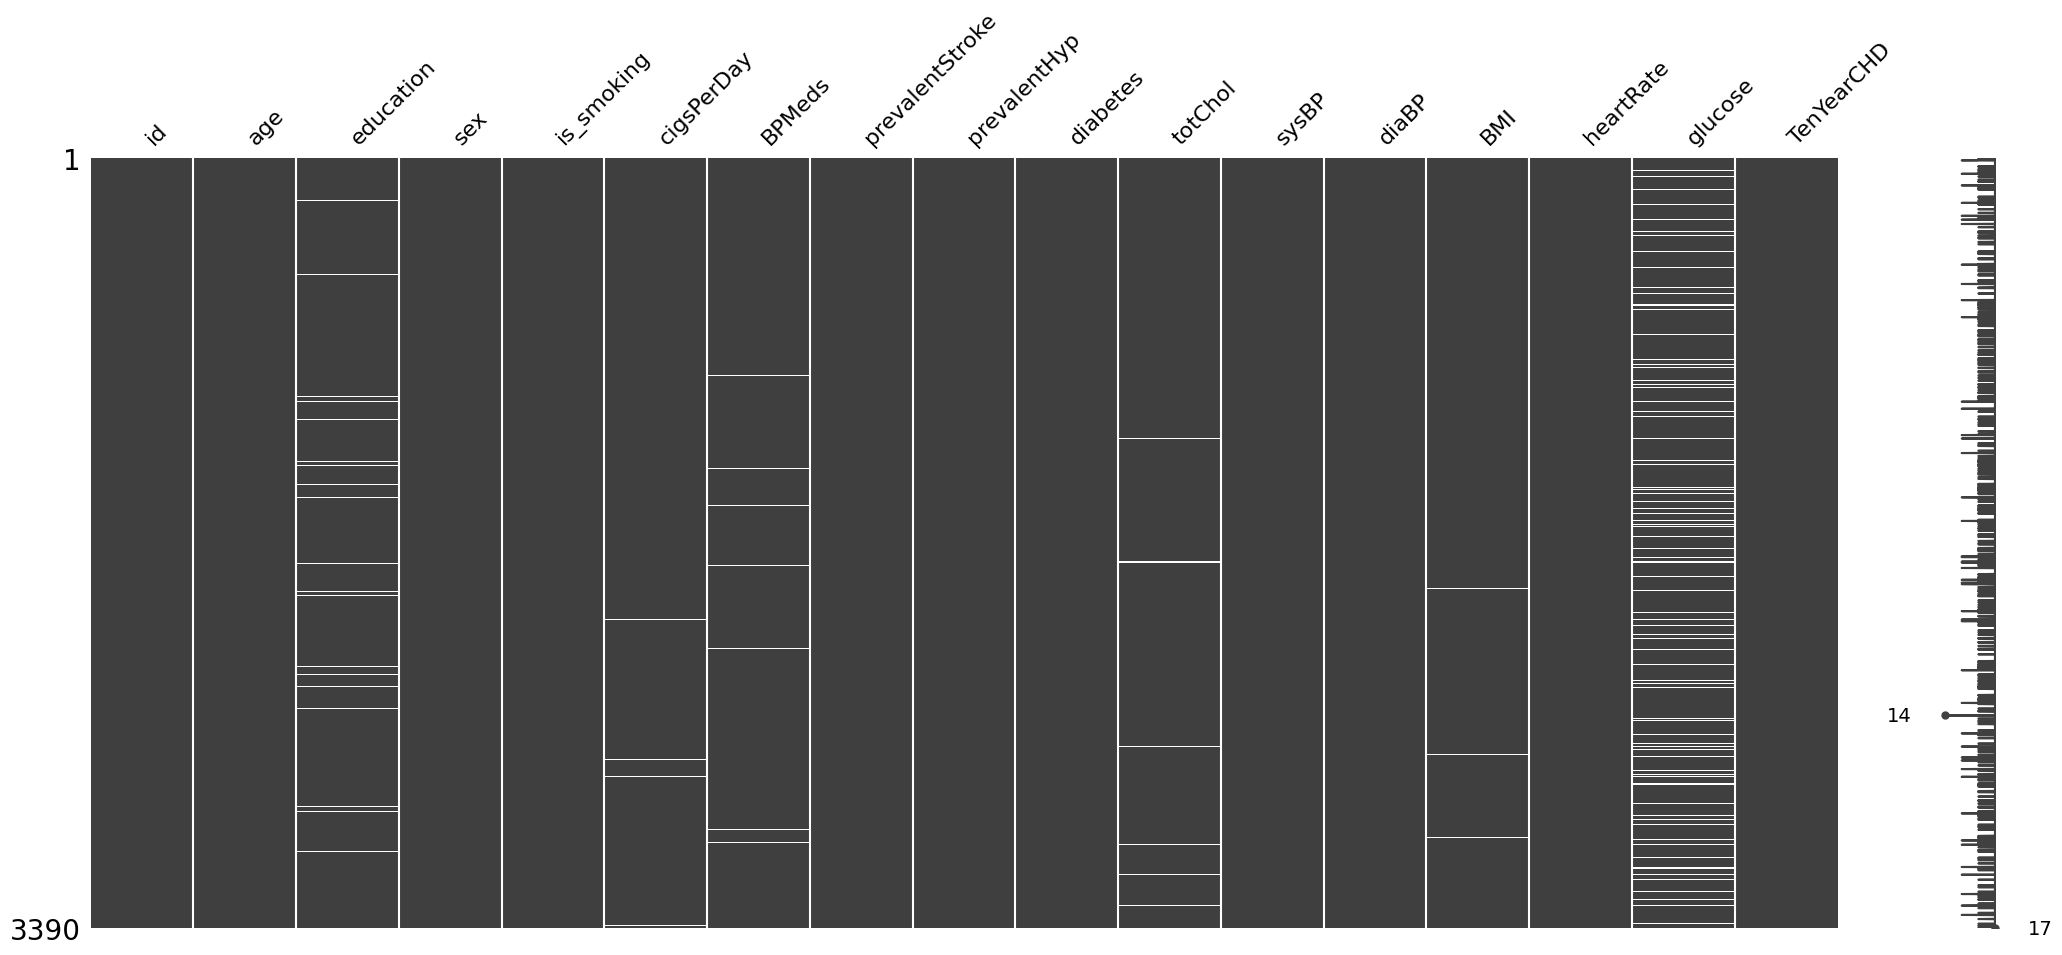

In [11]:
# Visualizing the missing values
import missingno as msno
 
# Visualize the number of missing
# values as a Matrix
msno.matrix(df)

### What did you know about your dataset?



*   The dataset has 3390 rows and 17 columns. 

* The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 

* The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

* The dataset provides the patients’ information. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.














## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description 

The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioural, and medical risk factors




Demographic:
1. Sex: male or female("M" or "F")

2. Age: Age of the patient

Behavioral:

3. is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

4. Cigs Per Day: the number of cigarettes that the person smoked on average in one day

Medical(History):

5. BP Meds: whether or not the patient was on blood pressure medication

6. Prevalent Stroke: whether or not the patient had previously had a stroke

7. Prevalent Hyp: whether or not the patient was hypertensive

8. Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)

Medical(Current):

9. Tot Chol: total cholesterol level

10. Sys BP: systolic blood pressure

11. Dia BP: diastolic blood pressure

12. BMI: Body Mass Index

13. Heart Rate: heart rate

14. Glucose: glucose level

Predict Variable(desired target)

15. CHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

others:

16. ID: patient ID's

17. Education: The level of education of the patient (categorical values - 1,2,3,4)


### Check Unique Values for each variable.

In [14]:
#Check Unique Values for each variable
unique_count = df.nunique().sort_values(ascending=False)
print(unique_count)

id                 3390
BMI                1259
totChol             240
sysBP               226
diaBP               142
glucose             132
heartRate            68
age                  39
cigsPerDay           32
education             4
prevalentHyp          2
diabetes              2
prevalentStroke       2
BPMeds                2
is_smoking            2
sex                   2
TenYearCHD            2
dtype: int64


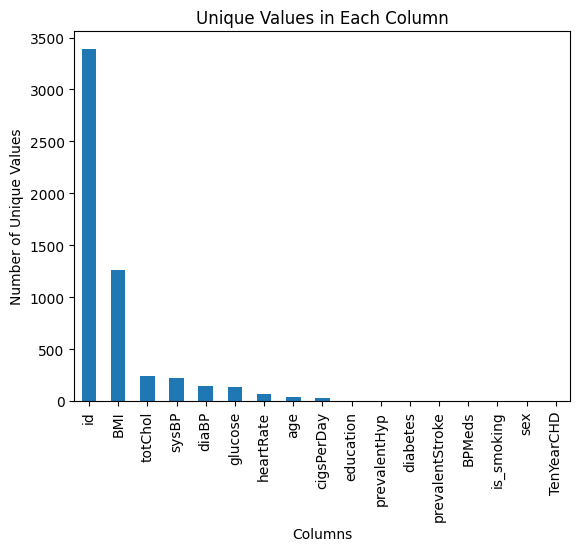

In [ ]:
unique_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Values in Each Column')
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [16]:
# Write your code to make your dataset analysis ready.
# Rename columns
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [17]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes',
       'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd'],
      dtype='object')

In [18]:
# Encoding the binary columns
def convert_gender_column(dataframe, column_name):
   
    df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original data
    
    df[column_name].replace({'M': 1, 'F': 0}, inplace=True)
    
    return df




In [19]:
# Convert "gender" column values to 1 for 'M' and 0 for 'F' (replace the original data)
df = convert_gender_column(df, 'sex')

In [20]:
# Encoding the binary columns
def convert_is_smokig_column(dataframe, column_name):
   
    df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original data
    
    df[column_name].replace({'YES': 1, 'NO': 0}, inplace=True)
    
    return df

In [21]:
# Convert "gender" column values to 1 for 'M' and 0 for 'F' (replace the original data)
df = convert_is_smokig_column(df, 'is_smoking')

In [22]:
df.isna().sum()

id                     0
age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

In [24]:
#replace NaN values with zeros 
null_list = ['education','cigs_per_day','total_cholesterol','bmi','heart_rate','glucose',] 

for i in null_list:
  df[i].fillna(0, inplace = True)

In [25]:
df.head()

,id,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [42]:
# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

### What all manipulations have you done and insights you found?

we found Null values in 7 Features/columns,
those are:

*   bp_meds
* cigs_per_day
* total_cholesterol
*  bmi
*  heart_rate
*  glucose
*  Education









## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

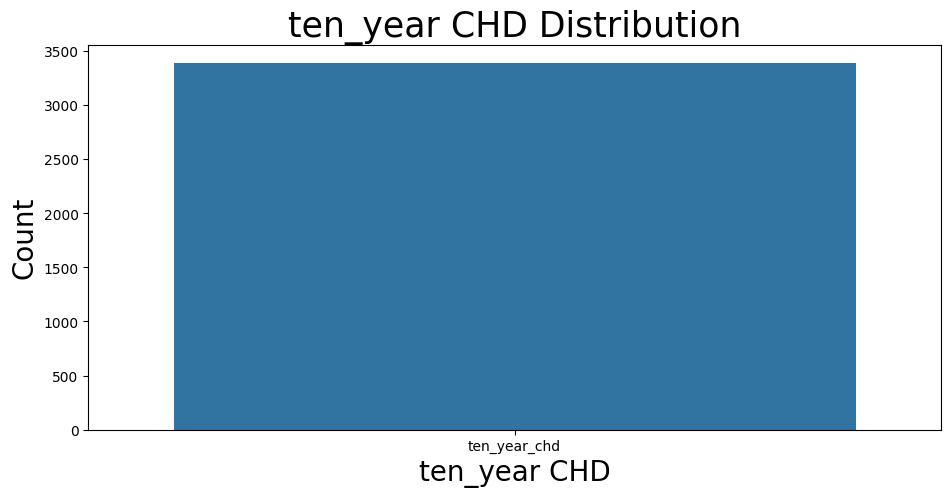

In [ ]:
# Chart - 1 visualization code
# Distribution of dependent varaible - ten_year_chd
plt.figure( figsize=(11, 5))
plt.title("ten_year CHD Distribution", fontsize = 25)
sns.countplot(df[dependent_var])
plt.xlabel('ten_year CHD', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()


In [ ]:
# Distribution of dependent variable
df[dependent_var].value_counts()

ten_year_chd
0               2879
1                511
dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

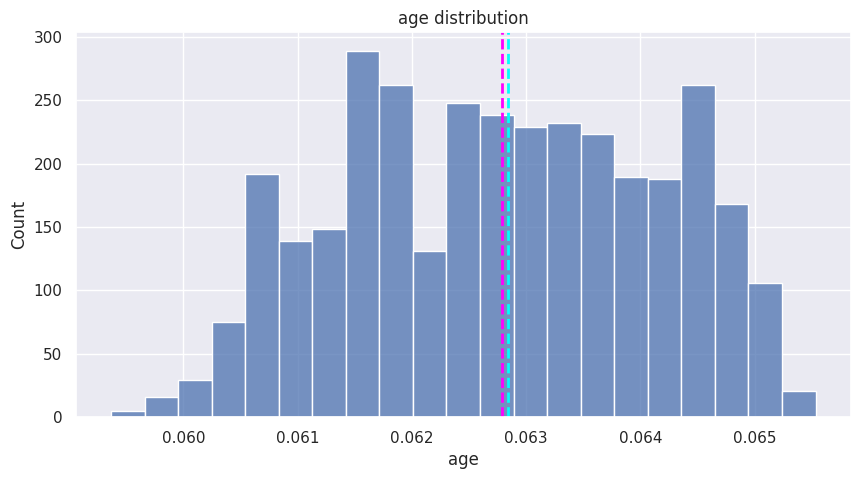

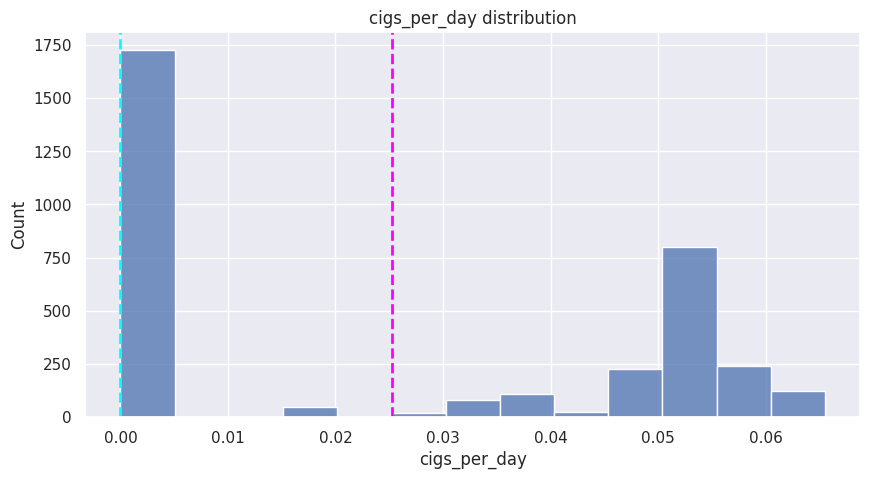

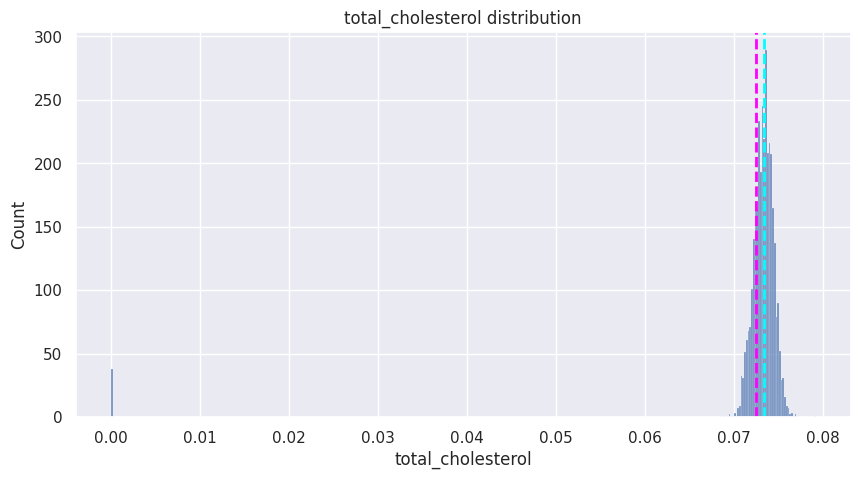

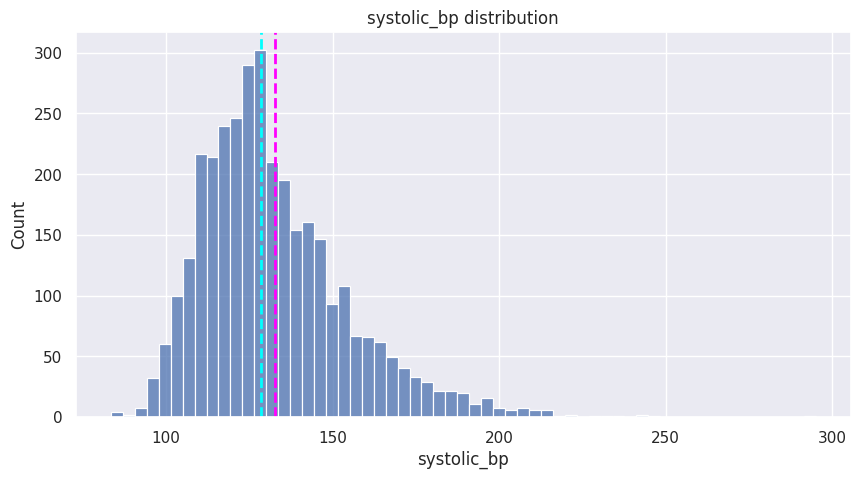

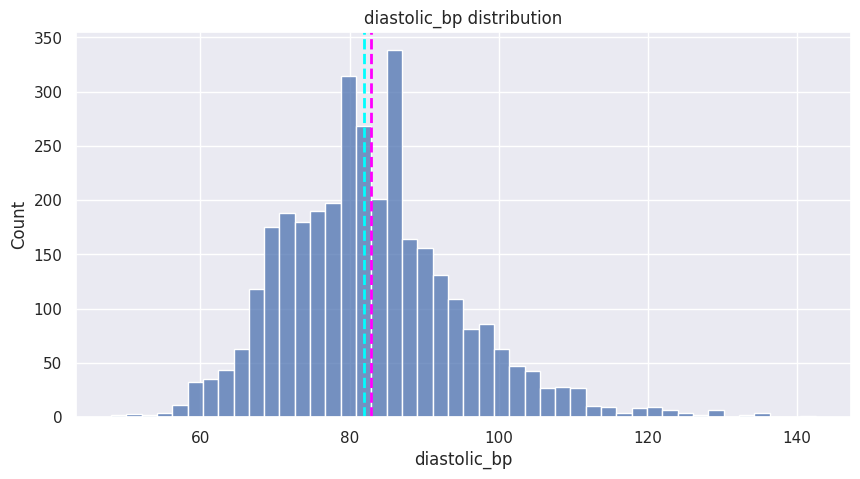

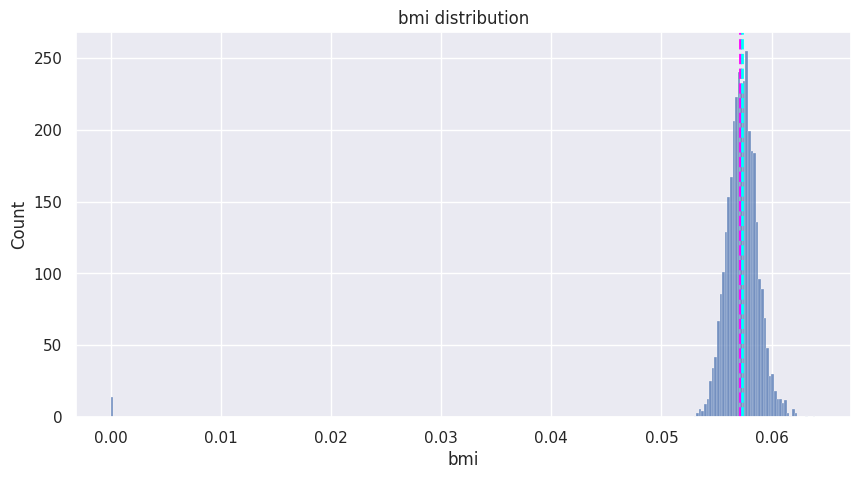

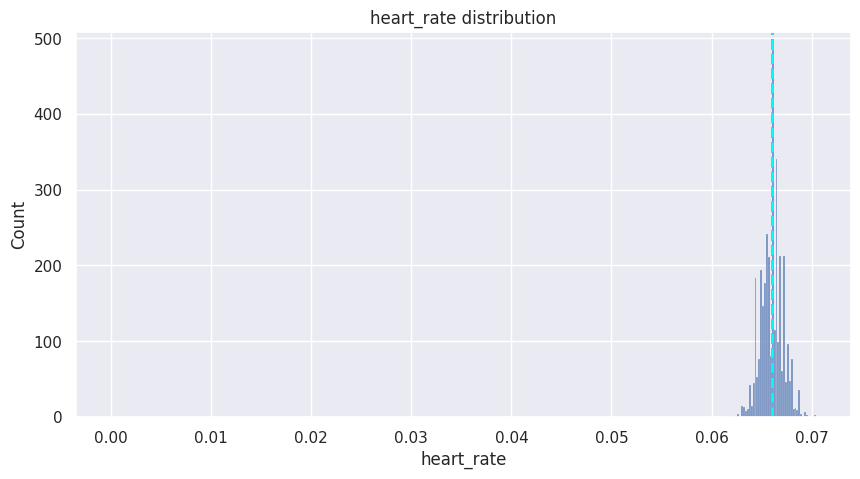

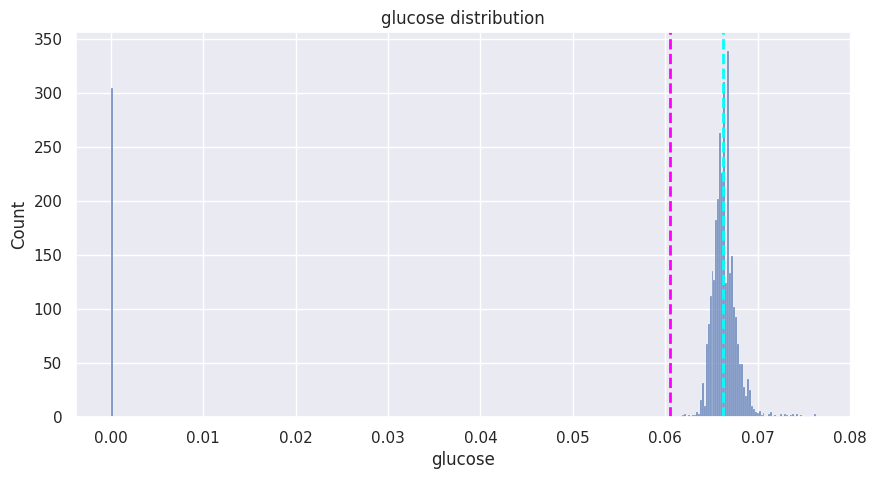

In [ ]:
# Chart - 2 visualization code
# Analysing the distribution of continuous variables in the dataset
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The distribution of several features is skewed, and contains outliers. We'll deal with the skew afterwards.

all features are continous features

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

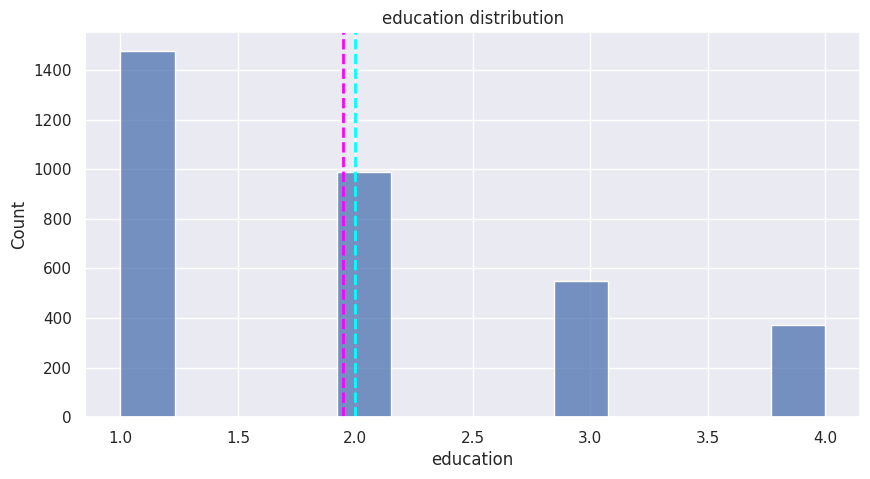

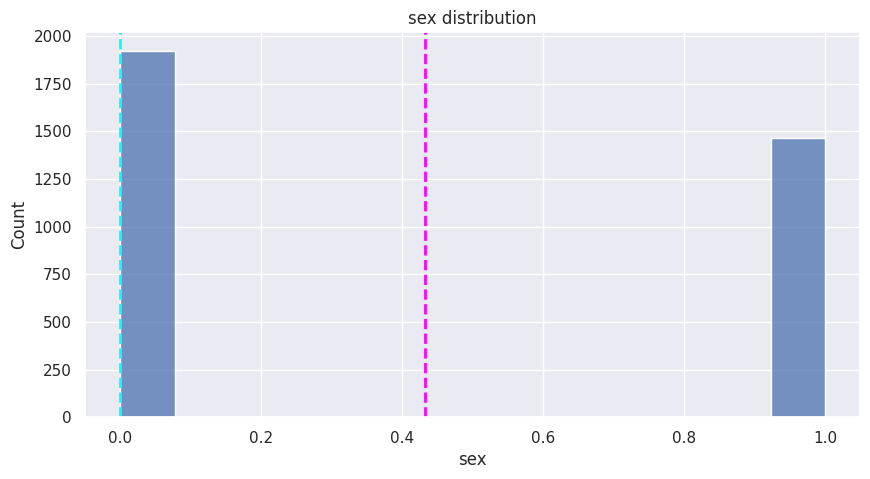

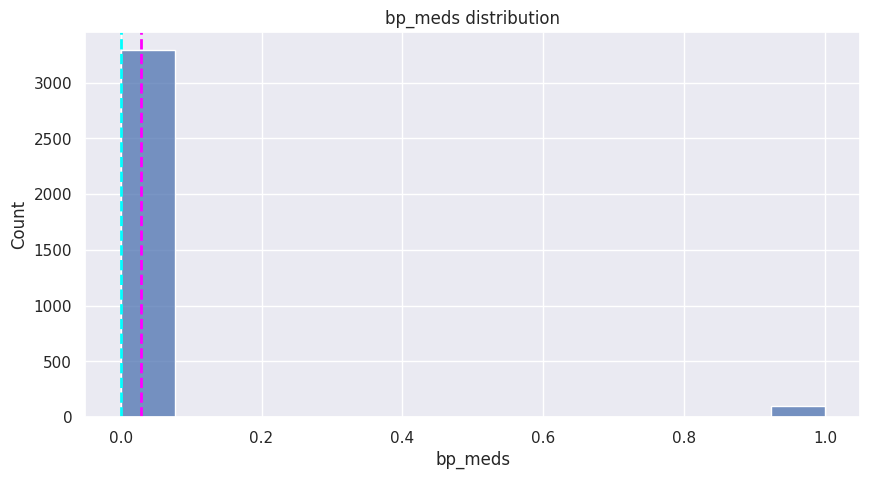

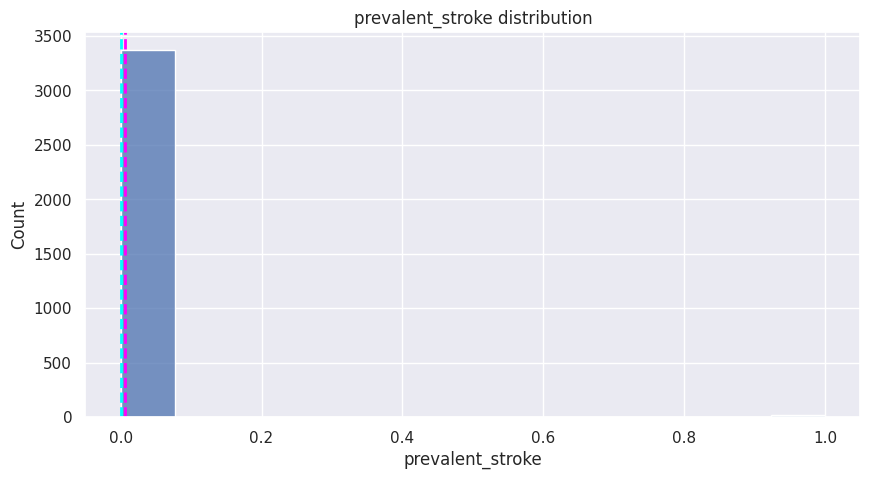

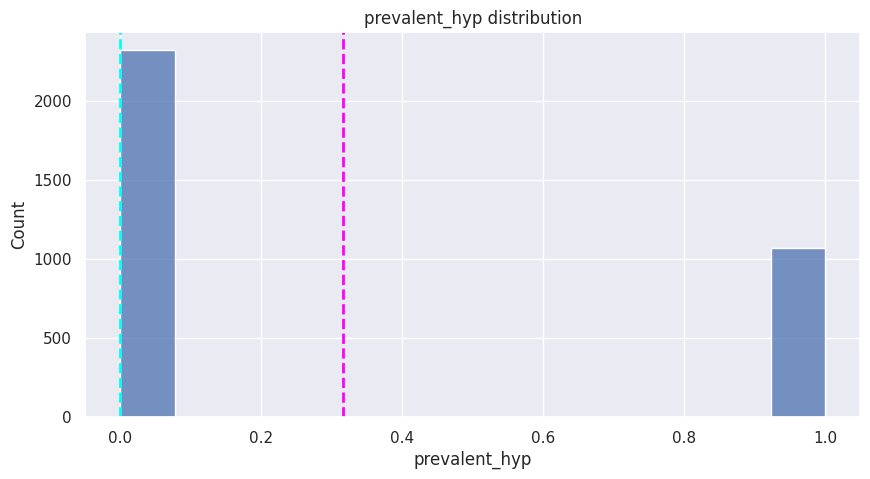

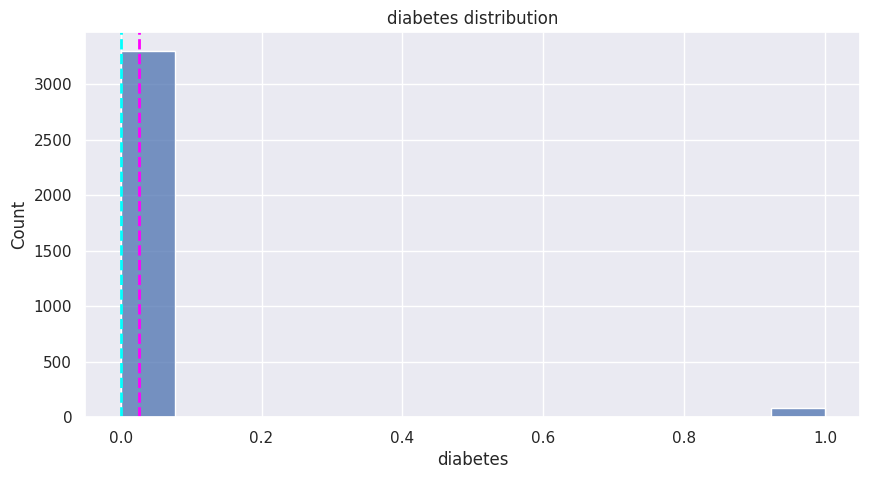

In [ ]:
# Chart - 3 visualization code
# Analysing the distribution of categorical variables in the dataset
for col in categorical_var:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?



* 
Education and Bpm are descreate features,



*   List most number of patient's age falls in the range 35-45

*  most number of patients smoke cigarette in range of 0-10


*  most number of patients  are not on BP medications and most number of patients does not have a stroke previously

*  most number of patients  are  hot hypotensive and not diabetic also

*  most number of patients cholesterol falls in the range 200 - 300

*  most number of patients  systolic blood pressure falls in the range 100 - 150

*  most number of patients diastolic blood pressure falls in the range  70 - 90

*  most number of patient's BMI falls in the range 20 - 30  and a very few above 40
*  most number of patient's Heart rate falls in the range 70 - 90

*  most number of patient's glucose levels falls in the range 50 - 100



* Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.

* There are more female patients compared to male patients.
Almost half the patients are smokers.

* There are more female patients compared to male patients.
* Almost half the patients are smokers.

* 100 patients under the study are undertaking blood pressure medication.

* 22 patients under the study have experienced a stroke.

* 1069 patients have hypertension.

* 87 patients have diabetes.











##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

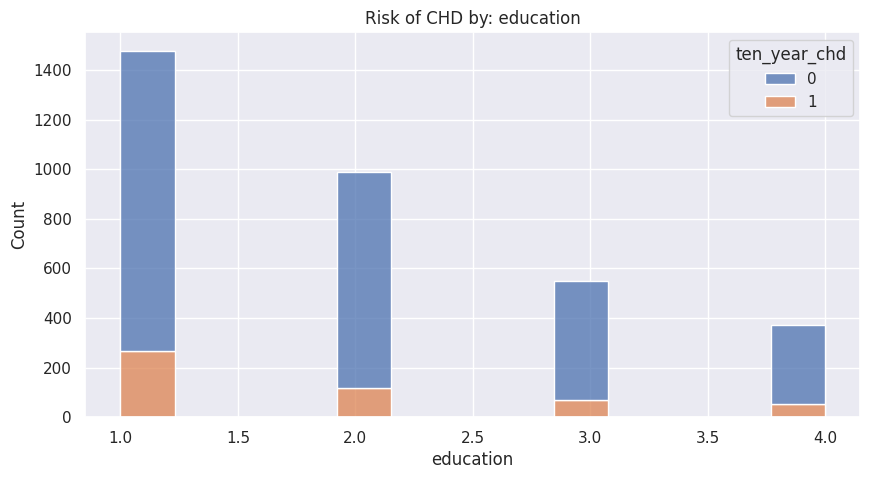

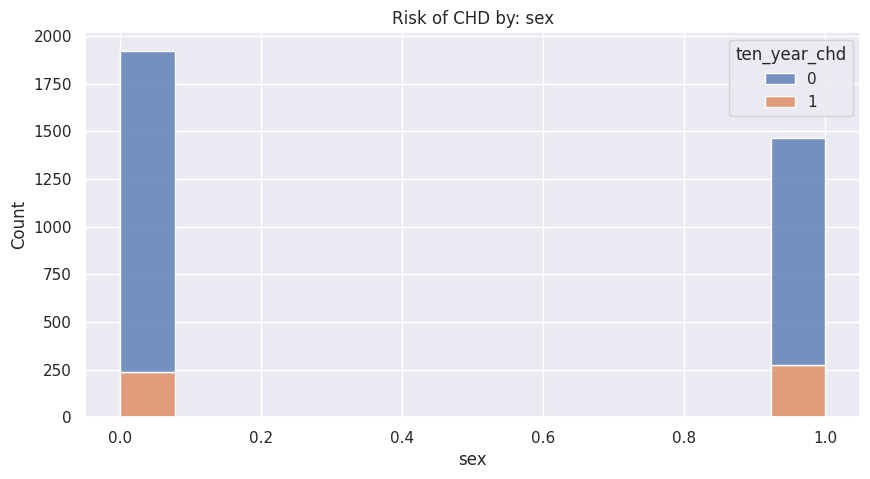

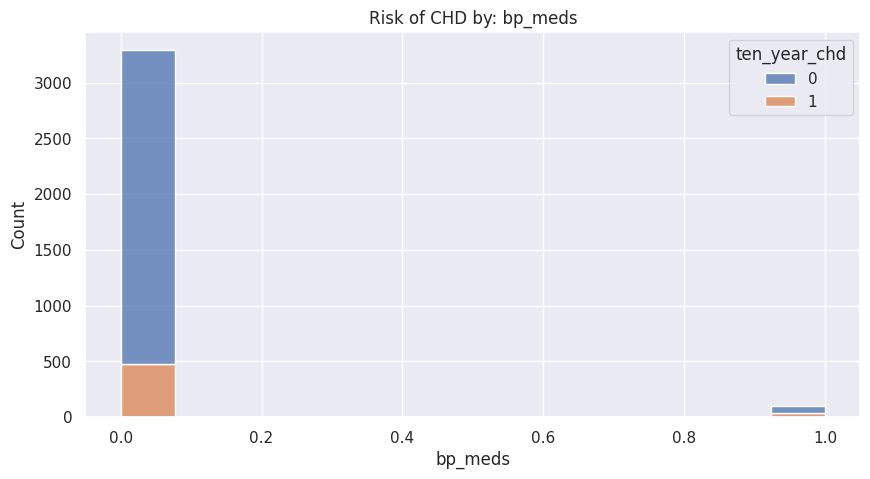

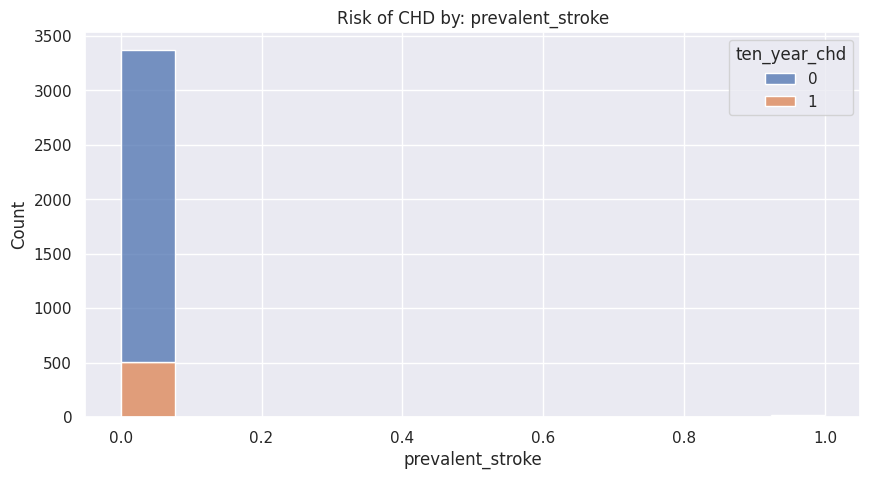

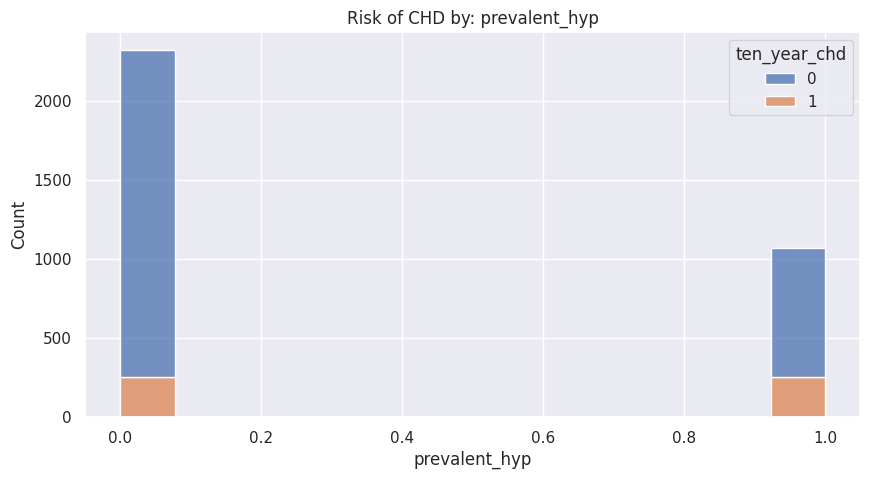

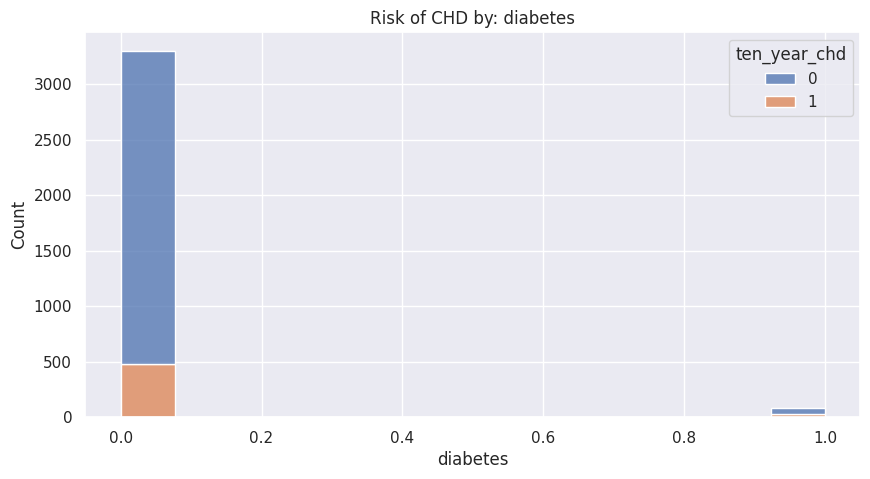

In [ ]:
# Analyzing the relationship between the dependent variable and categorical independent variables
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue=dependent_var[0], data=df, stat="count", multiple="stack")
  plt.title('Risk of CHD by: '+i)
  # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Since the attributes are unevenly 

* in Education, the risk of cardivascular disease is in between 200-250 out of 1400-1500 from 1 category,
similarlly for 2nd category the range is betwwen 50 - 150, for 3rd category the range is in between 0- 100, and for 4th category the range in between 0-50


* in sex feature, the risk of cardivascular disease to both male and female comparitively same
* in bp_meds column, the risk of cardivascular disease chance is 500 out of 3000 patients

* the risk of cardivascular disease to patient's  by prevelent stroke is 500 out of 3760

*  distributed, it is difficult to make direct comparisons and draw conclusions.

Let's build a 100% stacked bar chart to get a better idea of the distribution of the dependent variable.










*   List item



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Figure size 1000x500 with 0 Axes>

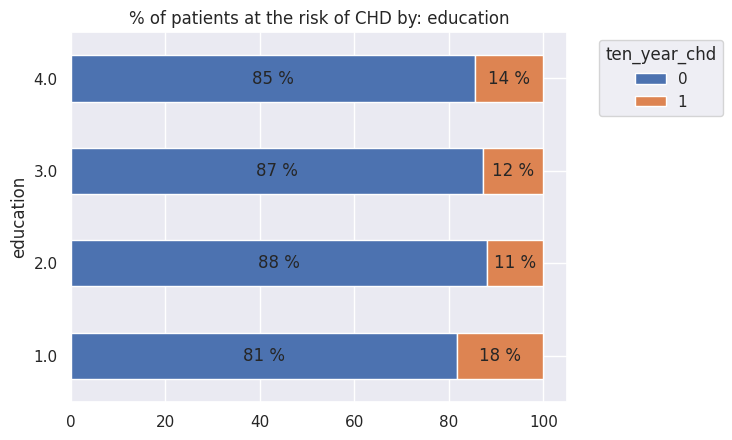

<Figure size 1000x500 with 0 Axes>

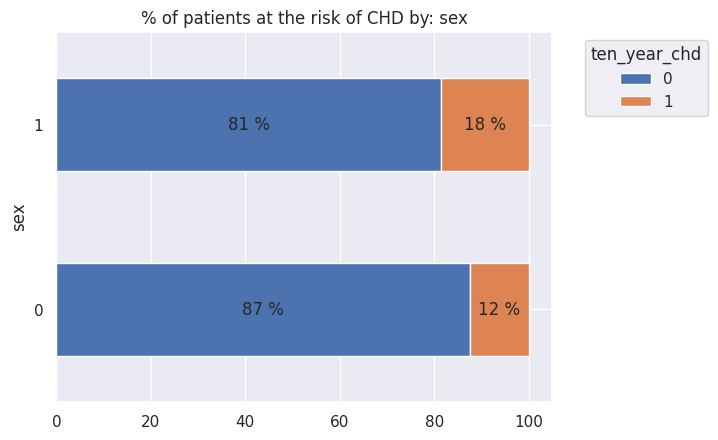

<Figure size 1000x500 with 0 Axes>

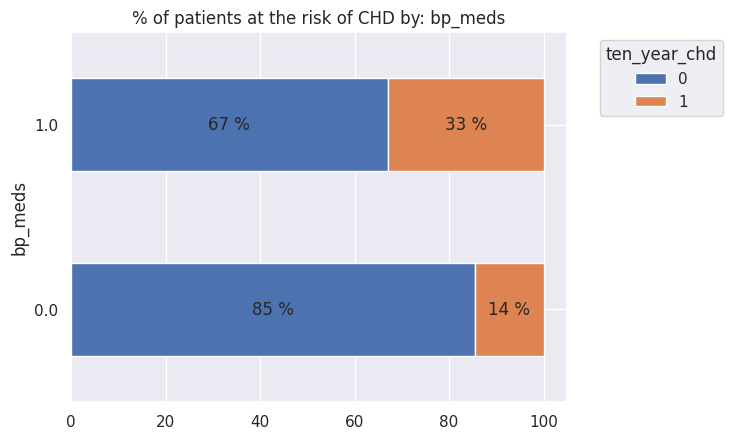

<Figure size 1000x500 with 0 Axes>

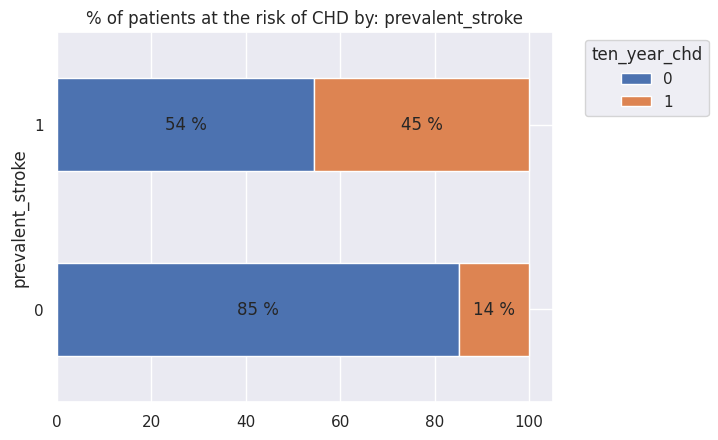

<Figure size 1000x500 with 0 Axes>

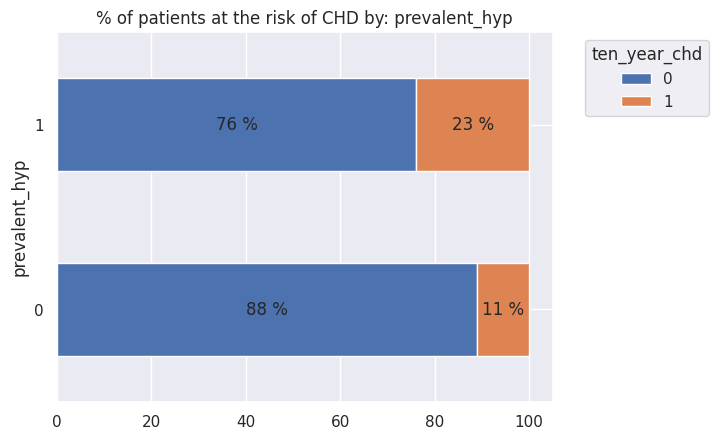

<Figure size 1000x500 with 0 Axes>

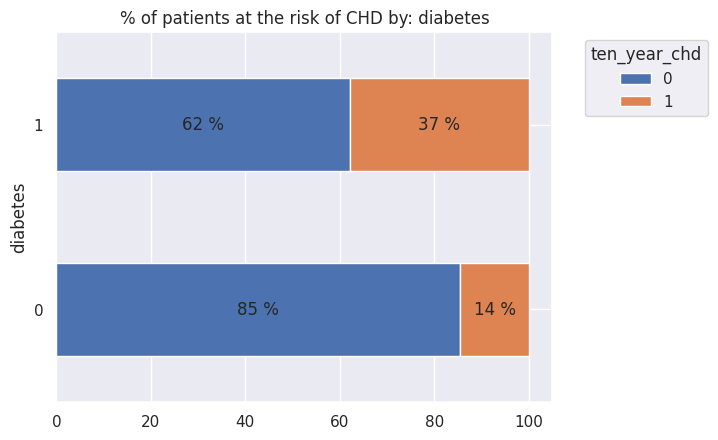

In [ ]:
# Chart - 5 visualization code
# 100% stacked bar chart

for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1. 18%, 11%, 12%, 14% of the patients belonging to the education level 1, 2, 3, 4 respectively were eventually diagnosed with CHD.

2. Male patients have significantly higher risk of CHD (18%) than female patients (12%)

3.Patients who smoke have significantly higher risk of CHD (16%) than patients who don't smoke (13%)

4.Patients who take BP medicines have significantly higher risk of CHD (33%) than other patients (14%)

5.Patients who had experienced a stroke in their life have significantly higher risk of CHD (45%) than other patients (14%)


6.Hypertensive patients have significantly higher risk of CHD (23%) than other patients (11%)

7.Diabetic patients have significantly higher risk of CHD (37%) than other patients (14%)







##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 1.0, 'Pulse Pressure Distribution')

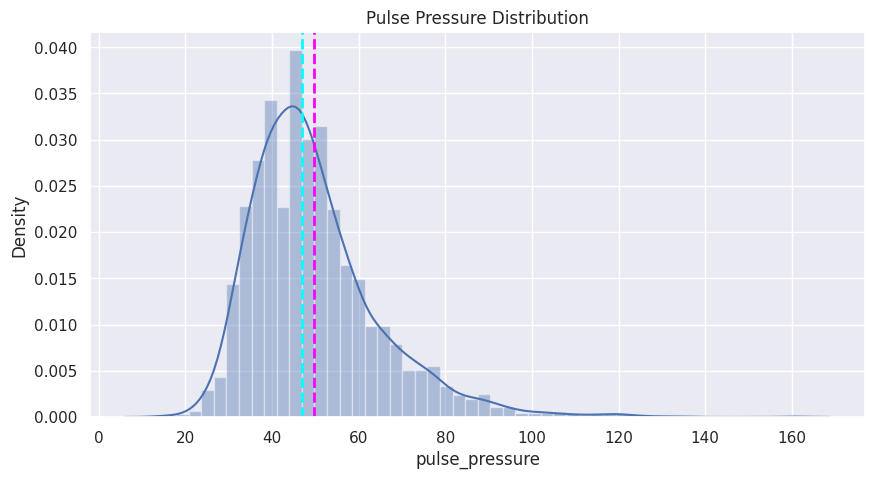

In [ ]:
# Chart - 6 visualization code
# Chart - 13 visualization code
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The pulse pressures are positively skewed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Co-relation of the columns')

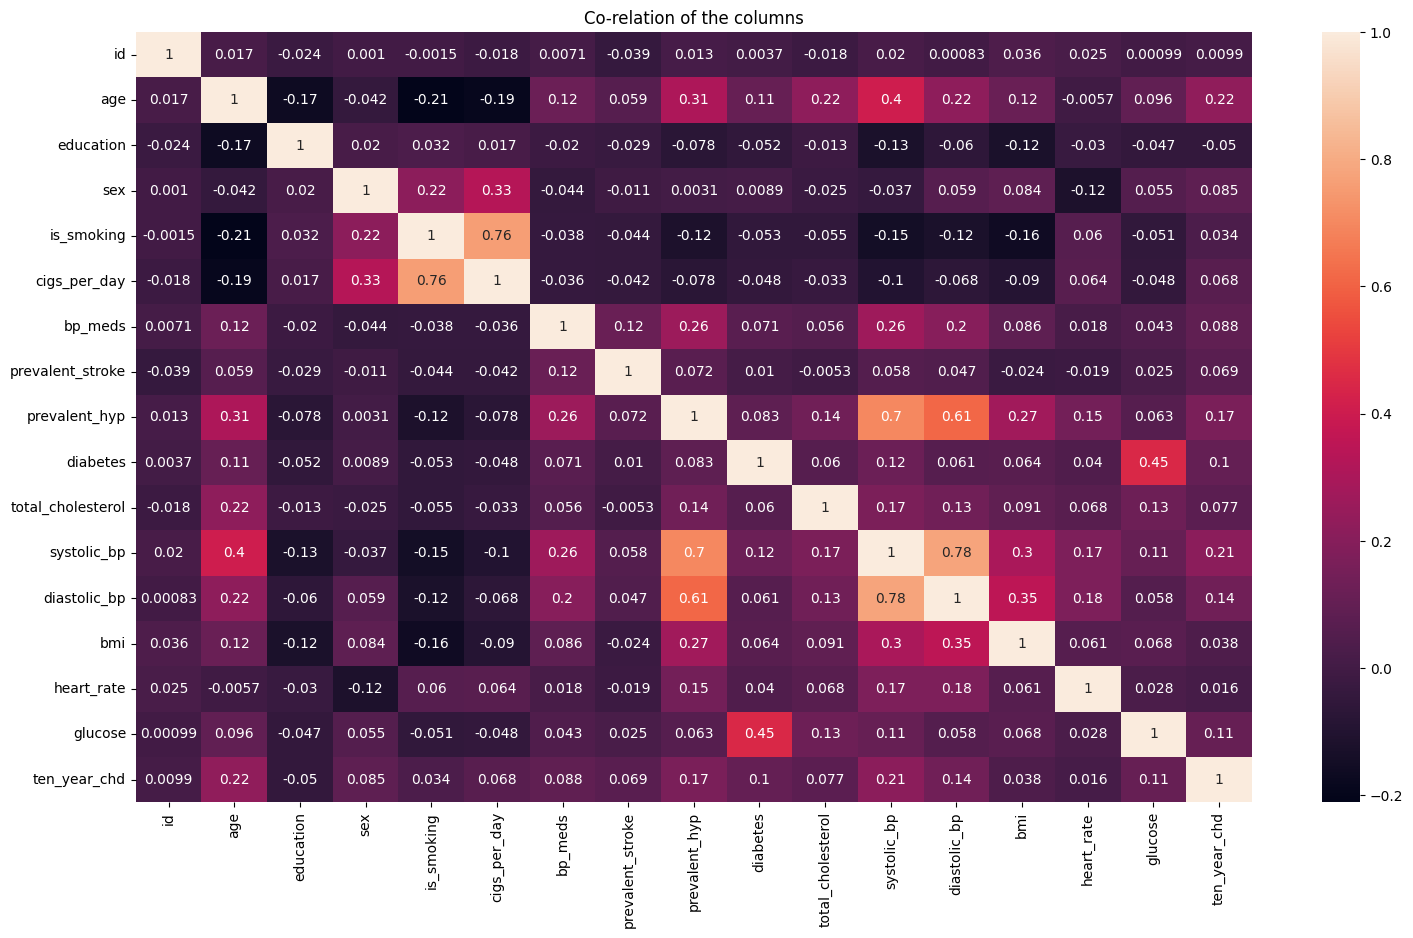

In [27]:
# Correlation Heatmap visualization code

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

##### 1. Why did you pick the specific chart?

A correlation heatmap is a type of chart that is commonly used to visualize the relationship between multiple variables in a dataset.To identify the strength and direction of the relationships between variables



##### 2. What is/are the insight(s) found from the chart?

hence, from the above correlation heatmap we can observe that.

1.The variables systolic BP and diastolic BP are positively correlated.

2.is smoking and cigs per day are 76% correlated with each other

3.prevent_hyp and sysBP are 70% correlated with each other 

4.sys_BP and diaBP are 78% correlated with each other

5.glucose and diabetes are 61% correlated with each other

6.prevent_hyp and diaBP are 61% correlated with each other 



#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##Handling Multicollinearity:

In [35]:
#Handling Multicollinearity:
# Range of systolic bp and diastolic bp

print(df['systolic_bp'].min(),df['systolic_bp'].max())
print(df['diastolic_bp'].min(),df['diastolic_bp'].max())

83.5 295.0
48.0 142.5


In [36]:
# Creating a new column pulse_pressure
# and dropping systolic_bp and diastolic_bp

df['pulse_pressure'] = df['systolic_bp']-df['diastolic_bp']
df.drop('systolic_bp',axis=1,inplace=True)
df.drop('diastolic_bp',axis=1,inplace=True)

In [37]:
# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To check whether discrete variables are related, chi2 test can be used. We define:
1. Null Hypothesis (H0): Two variables are independent.
2. Alternate Hypothesis (H1): Two variables are not independent.

#### 2. Perform an appropriate statistical test.

In [ ]:
 # chi2 scores
chi_scores = chi2(df[categorical_var],df[dependent_var])
chi_scores

(array([ 4.76184162, 13.77838959, 25.10243827, 15.8619983 , 64.37770831,
        35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 5.43640748e-07, 6.81331780e-05,
        1.02713702e-15, 2.54226209e-09]))

In [ ]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = df[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

education           2.909740e-02
sex                 2.056887e-04
prevalent_stroke    6.813318e-05
bp_meds             5.436407e-07
diabetes            2.542262e-09
prevalent_hyp       1.027137e-15
dtype: float64

<Axes: title={'center': 'P-value for discrete features'}>

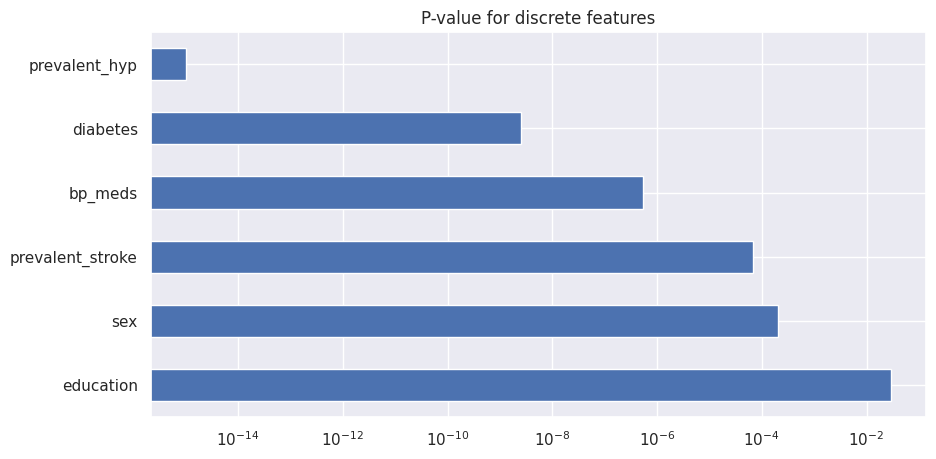

In [ ]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

##### Which statistical test have you done to obtain P-Value?

Since prevalent hypertension column (prevalent_hyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines the outcome of the dependent variable.

The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).

We can drop this column since we already have a column cigs_per_day, which gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [28]:
# dropping is_smoking
df.drop('is_smoking',axis=1,inplace=True)

In [29]:
# dropping is smoking 
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

In [30]:
# Handling Missing Values & Missing Value Imputation
# Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])

In [31]:
#Validate the missing value treatment:
# education distribution after mode imputation
df.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
0.0      87
Name: education, dtype: int64

In [32]:
# bp_meds distribution after mode imputation
df.bp_meds.value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

In [33]:
# Mean and median number of cigarettes per day
df.cigs_per_day.mean().round(0),df.cigs_per_day.median()

(9.0, 0.0)

In [34]:
# All missing values in the cigs_per_day column
df[df['cigs_per_day'].isna()]

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


#### What all missing value imputation techniques have you used and why did you use those techniques?

from the above table, we find that for every instance of missing values in cigs per day, the patients reported that they smoke.

### 2. Handling Outliers

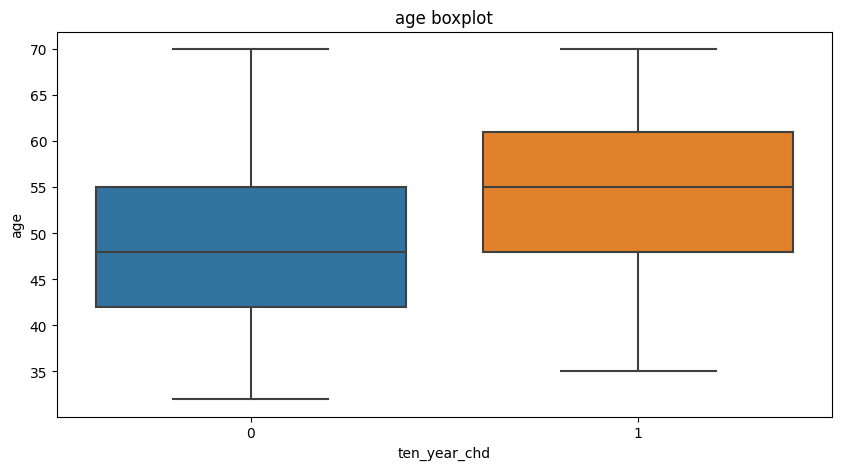

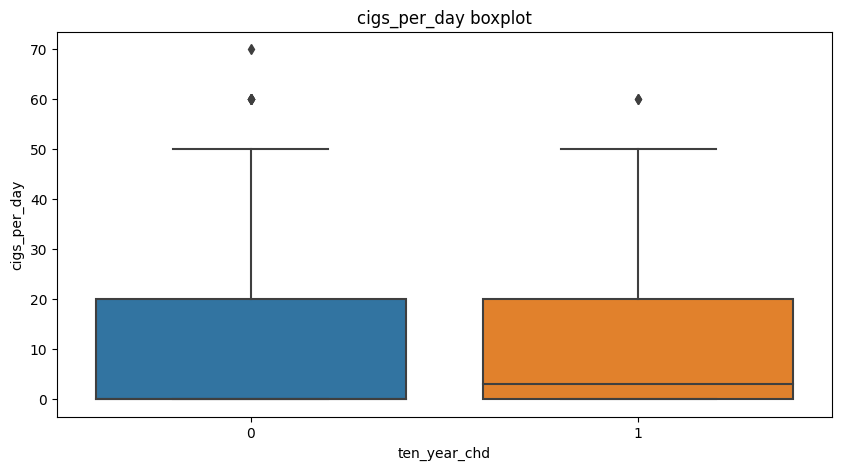

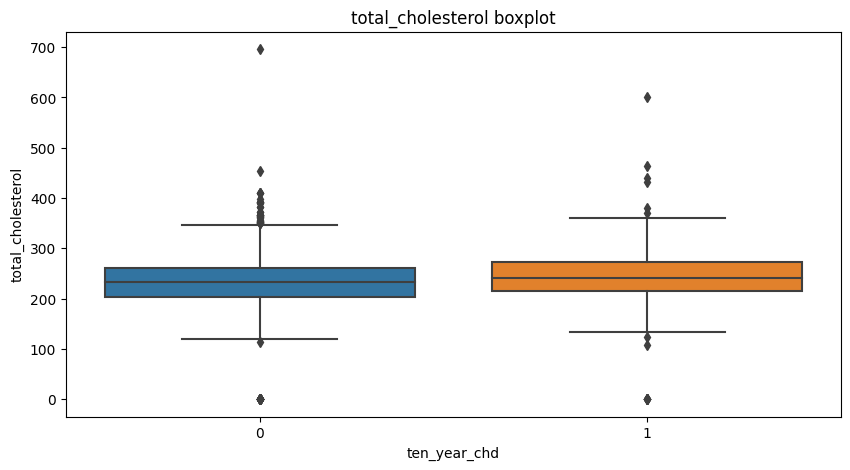

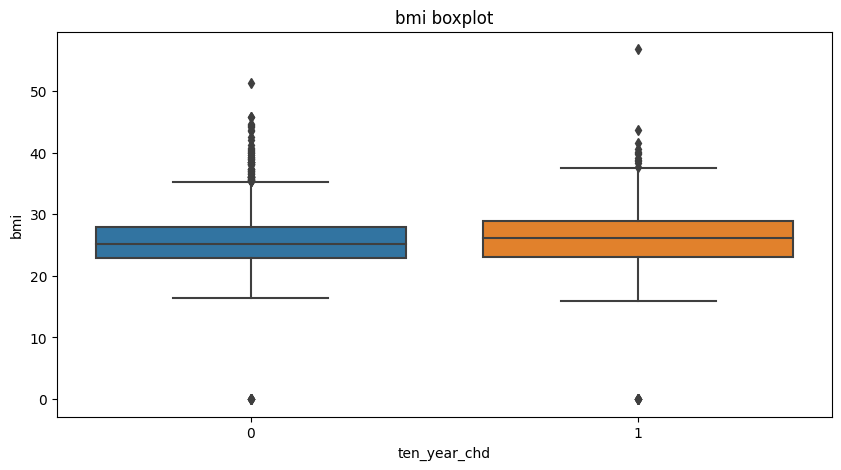

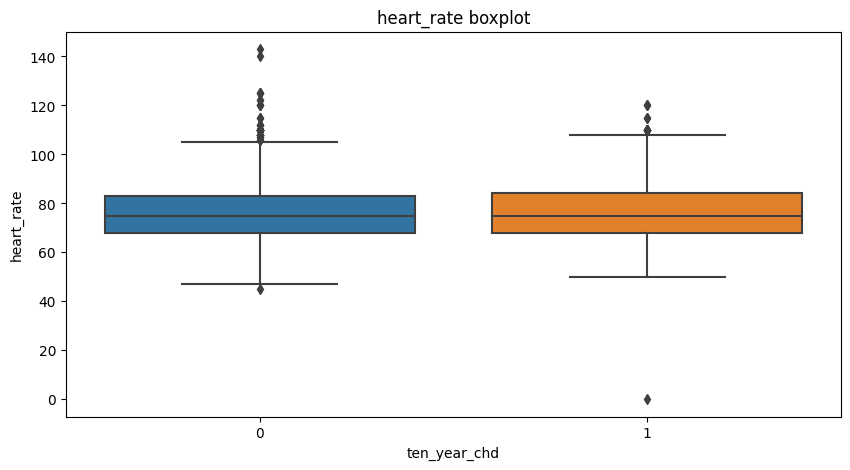

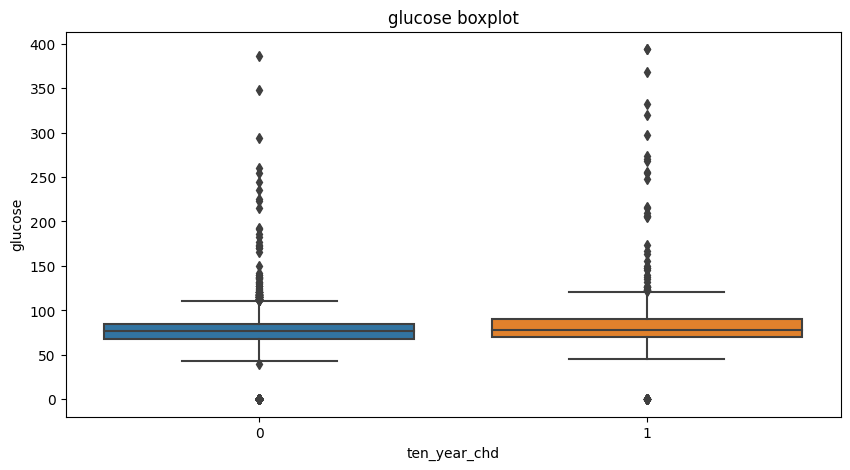

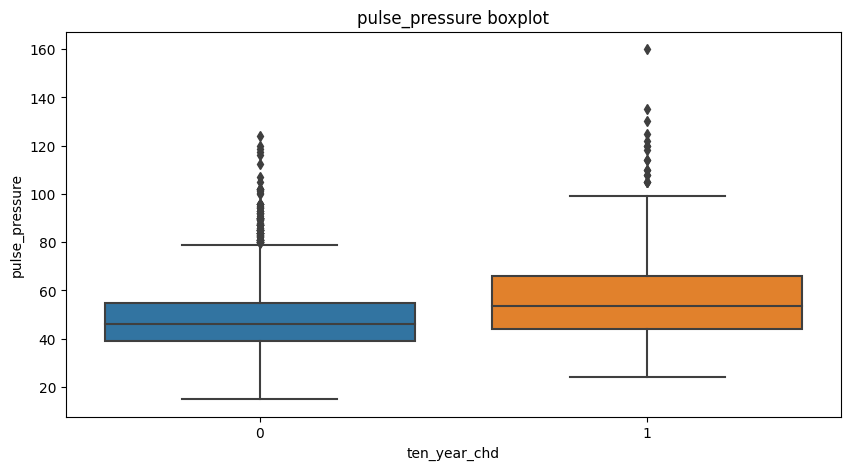

In [ ]:
# checking for outliers in continuous features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df)
  plt.title(col+' boxplot')
  plt.show()



1.There are outliers in the data, the effect of the outliers can be reduced to some extent by transforming it.

2.Once the data is transformed, if outliers beyond 3 standard deviations from the mean still remain, then they can be imputed with its respective median value.

3.This is done on the train data only to prevent data leakage.




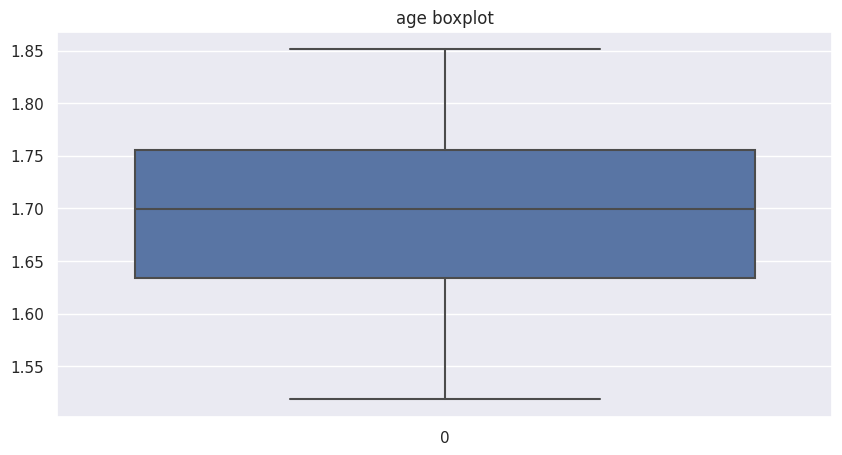

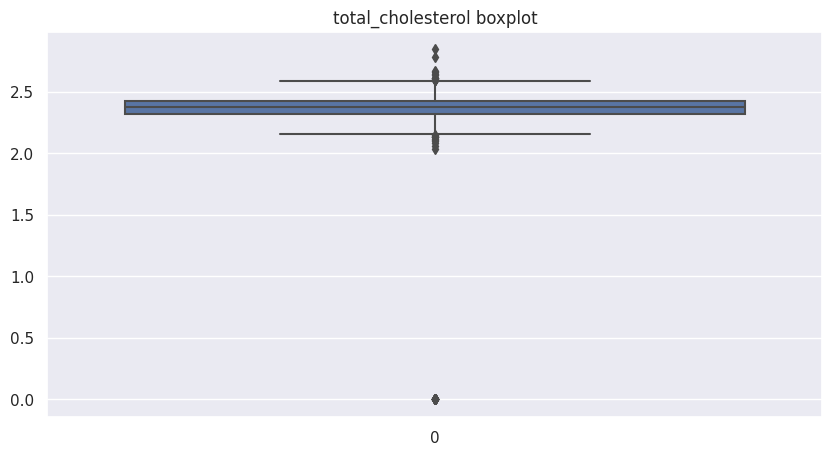

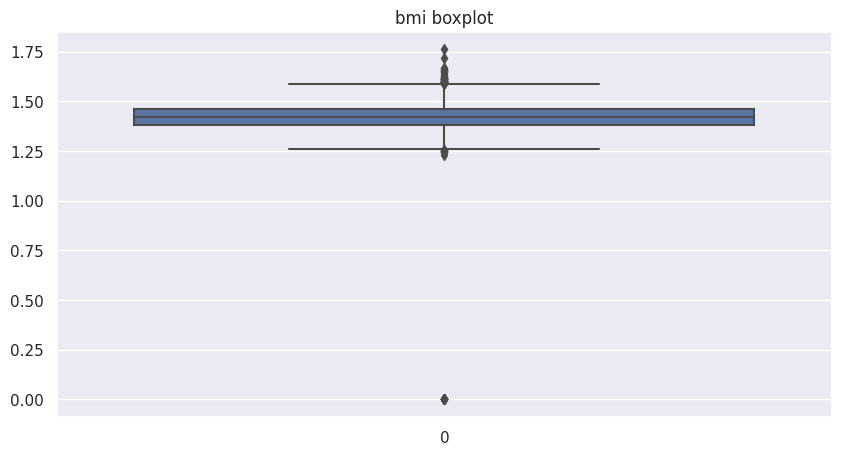

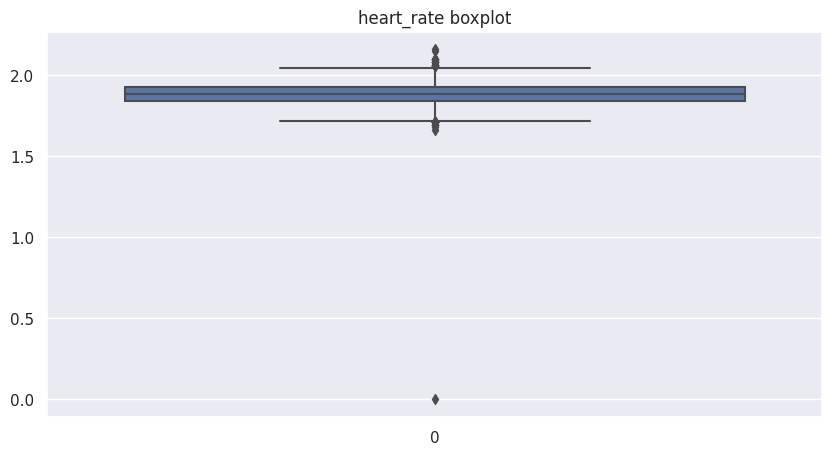

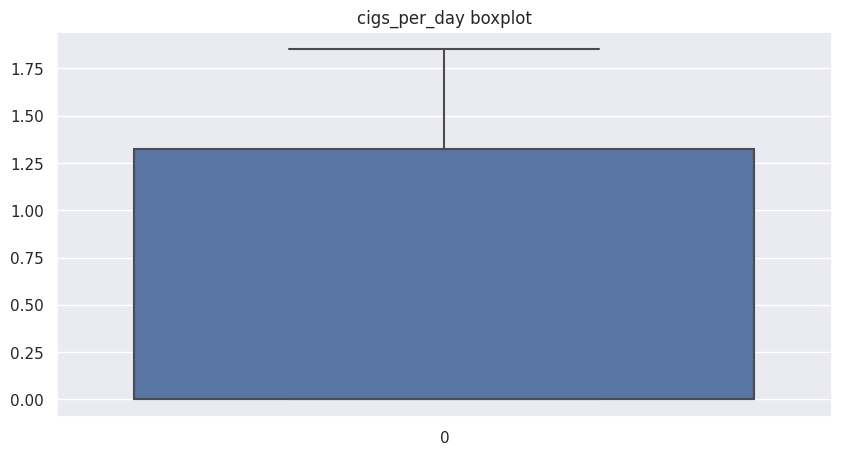

KeyError: ignored

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Checking outliers in total_cholesterol, bmi, heart_rate columns
for i in ['age','total_cholesterol','bmi','heart_rate','cigs_per_day','systolic_bp','diastolic_bp','glucose']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.title(i+' boxplot')
  plt.show()

In [ ]:
import pandas as pd
import numpy as np

def remove_outliers_zscore(dataframe, column_names, threshold=3):
    """
    Remove outliers from specified columns of a DataFrame using z-score method.
    
    Parameters:
        dataframe (pandas.DataFrame): The DataFrame containing the data.
        column_names (list): The list of column names to remove outliers.
        threshold (float): The z-score threshold to identify outliers (default: 3).
    
    Returns:
        pandas.DataFrame: The DataFrame with outliers removed.
    """
    df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original data
    
    for column_name in column_names:
        z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
        df = df[abs(z_scores) < threshold]
    
    return df


In [ ]:
# Specify the columns to remove outliers from
columns_with_outliers = ['age','total_cholesterol','bmi','heart_rate','cigs_per_day','glucose']

# Remove outliers using z-score method
df_cleaned = remove_outliers_zscore(df, columns_with_outliers, threshold=3)


In [ ]:
def visualize_outliers(dataframe, column_names):
    """
    Visualize outliers in specified columns of a DataFrame.
    
    Parameters:
        dataframe (pandas.DataFrame): The DataFrame containing the data.
        column_names (list): The list of column names to visualize outliers.
    """
    df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original data
    
    # Plot box plots for each column before outlier removal
    plt.figure(figsize=(22, 11))
    for i, column_name in enumerate(column_names):
        plt.subplot(2, len(column_names), i + 1)
        sns.boxplot(x=column_name, data=df)
        plt.title(f'Before: {column_name}')
        plt.ylabel('Value')
    
    # Plot box plots for each column after outlier removal
    df_cleaned = remove_outliers_zscore(df, column_names)
    for i, column_name in enumerate(column_names):
        plt.subplot(2, len(column_names), len(column_names) + i + 1)
        sns.boxplot(x=column_name, data=df_cleaned)
        plt.title(f'After: {column_name}')
        plt.ylabel('Value')
    
    plt.tight_layout()
    plt.show()

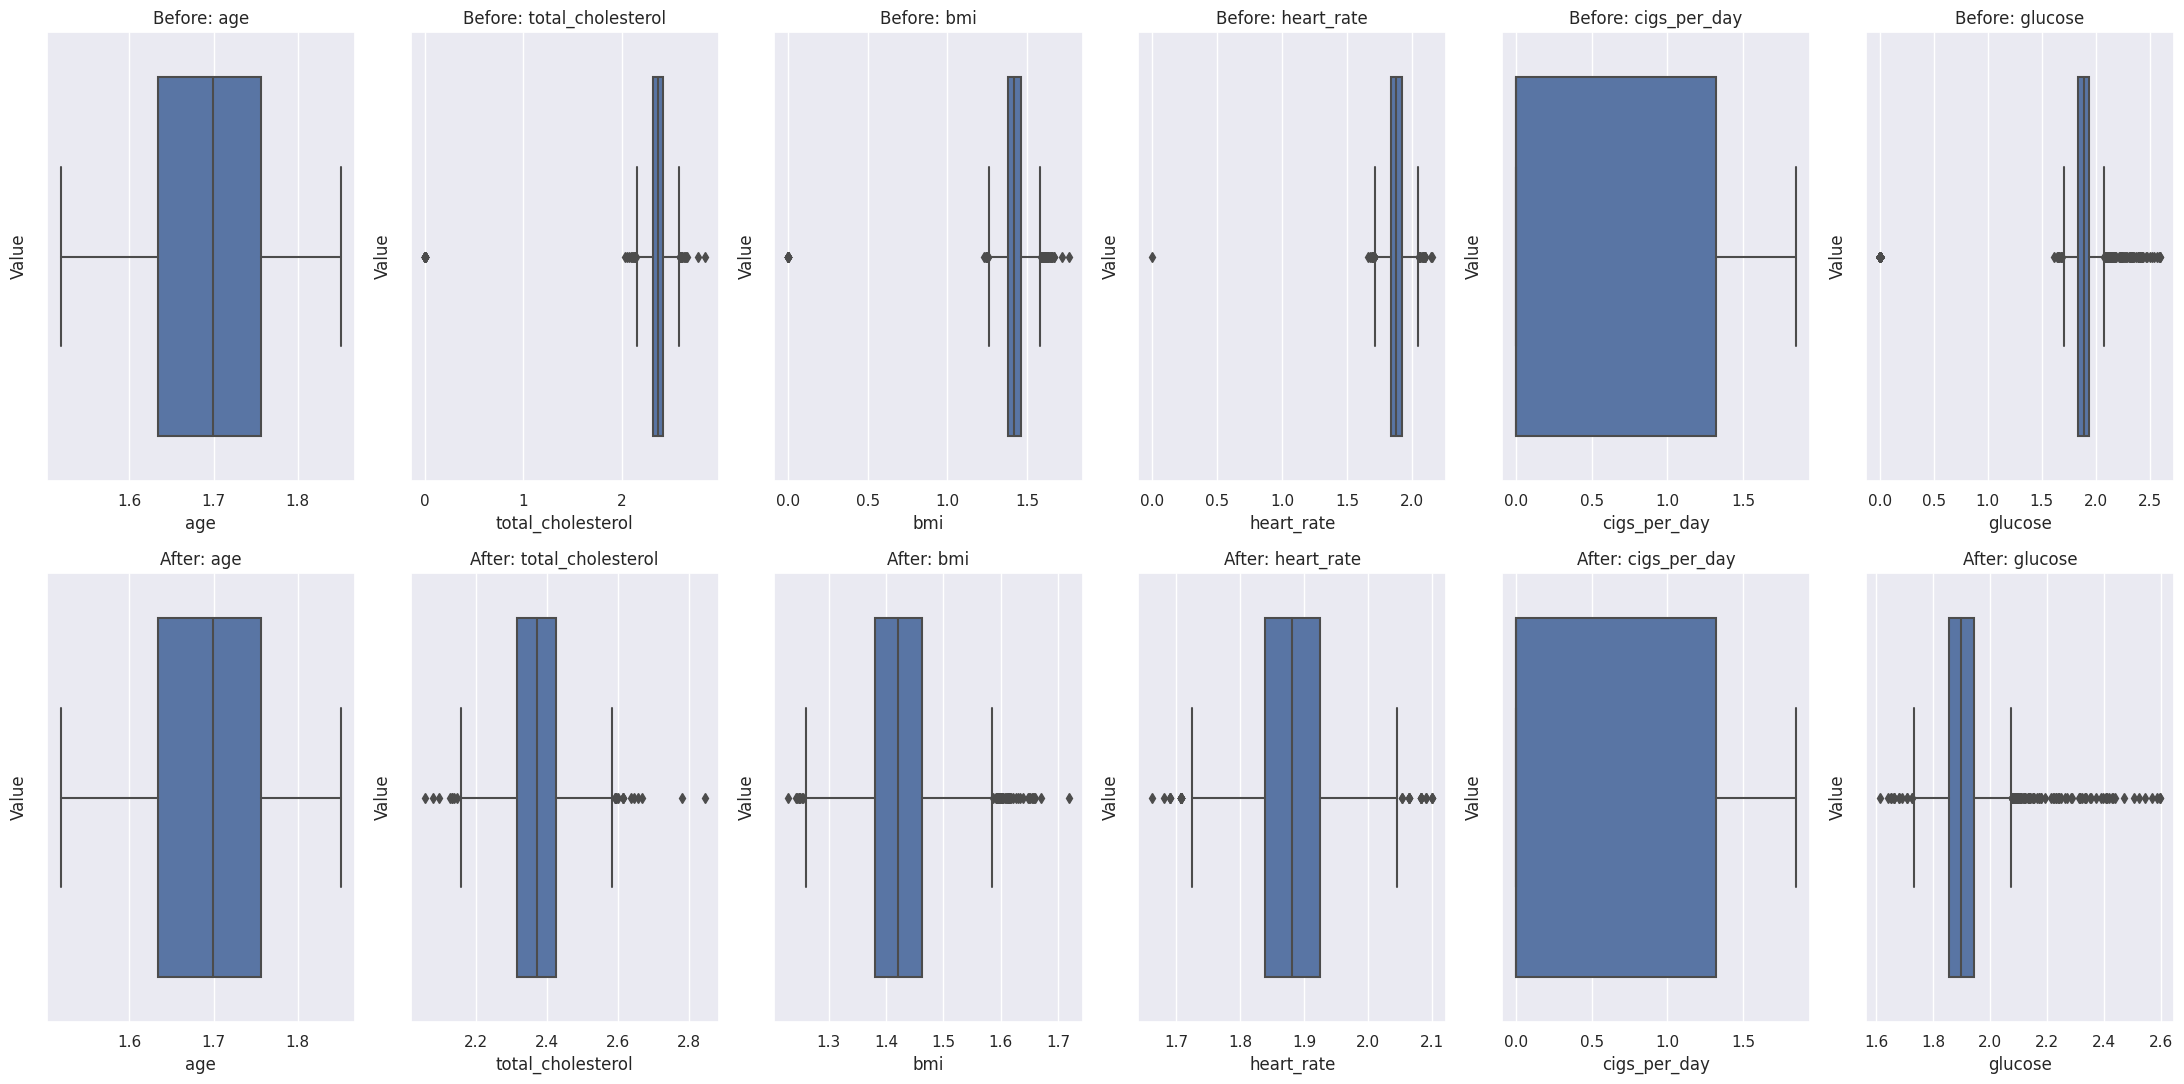

In [ ]:
columns_with_outliers = ['age','total_cholesterol','bmi','heart_rate','cigs_per_day','glucose']
visualize_outliers(df, columns_with_outliers)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# education distribution after mode imputation
#categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [ ]:
def one_hot_encoding(dataframe, column_names):
   
    df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original data
    
    df_encoded = pd.get_dummies(df, columns=column_names)
    
    return df_encoded


In [ ]:
# Perform one-hot encoding on multiple categorical columns
columns_to_encode = ['education', 'sex','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']
df_encoded_one_hot = one_hot_encoding(df, columns_to_encode)

df_encoded_one_hot.head()
df.head()

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
0,0,0.064875,2.0,0,0.033774,0.0,0,0,0,0.073039,148.0,85.0,NaN,0.067315,0.066491,1
1,1,0.060360,4.0,1,0.000000,0.0,0,1,0,0.072794,168.0,98.0,0.058747,0.065737,0.066031,0
2,2,0.062348,1.0,0,0.048149,0.0,0,0,0,0.073755,116.0,71.0,0.055319,0.067159,0.067615,0
3,3,0.063002,1.0,1,0.055157,0.0,0,1,0,0.073348,158.0,88.0,0.058294,0.065321,0.067615,1
4,4,0.064875,1.0,0,0.058814,0.0,0,0,0,0.073543,136.5,85.0,0.057701,0.065533,0.066219,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.



* after converting the categorical features into numerical features, the data has only numerical values

*  Feature scaling is a important preprocessing step. so we can standard scaler for feature scaling
*  Features that are measured at different scales do not contribute equally to the model fitting & model learned function and might endup creating bias
*  Thus, to deal with this potential problem feature-wise normalization such as standardScaler Sealing is usually used prior to model fitting.

* after scaling the data, the data is ready to fit into model

* we can split the data into training and test dataset with test size 20%



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# skewness along the index axis
(df[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.232049
total_cholesterol   -0.309748
bmi                  0.072411
heart_rate           0.596119
glucose              1.522661
pulse_pressure       1.412382
dtype: float64

In [ ]:
# Skew for log10 transformation
np.log10(df[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.301771
total_cholesterol   -7.975481
bmi                 -8.354920
heart_rate          -4.769793
glucose             -2.741680
pulse_pressure       0.354174
dtype: float64

In [ ]:
# Implementing log transformation on continuous variables

df['age']                   = np.log10(df['age']+1)
df['cigs_per_day']          = np.log10(df['cigs_per_day']+1)
df['total_cholesterol']     = np.log10(df['total_cholesterol']+1)
df['bmi']                   = np.log10(df['bmi']+1)
df['heart_rate']            = np.log10(df['heart_rate']+1)
df['glucose']               = np.log10(df['glucose']+1)
df['pulse_pressure']        = np.log10(df['pulse_pressure']+1)

In [ ]:
# Checking skew after log transformation
df[continuous_var].skew(axis = 0)

age                 -0.015053
cigs_per_day         0.301771
total_cholesterol   -7.975481
bmi                 -8.354920
heart_rate          -4.769793
glucose             -2.741680
pulse_pressure       0.354174
dtype: float64

<ipython-input-53-cb809ee5e1af>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


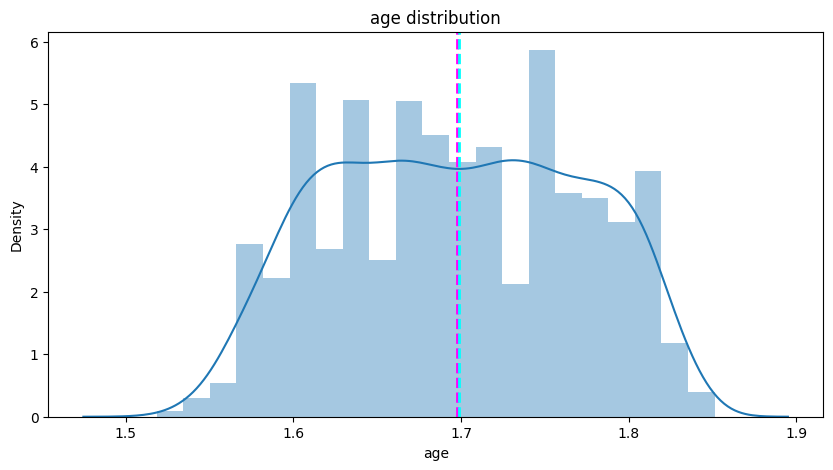

<ipython-input-53-cb809ee5e1af>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


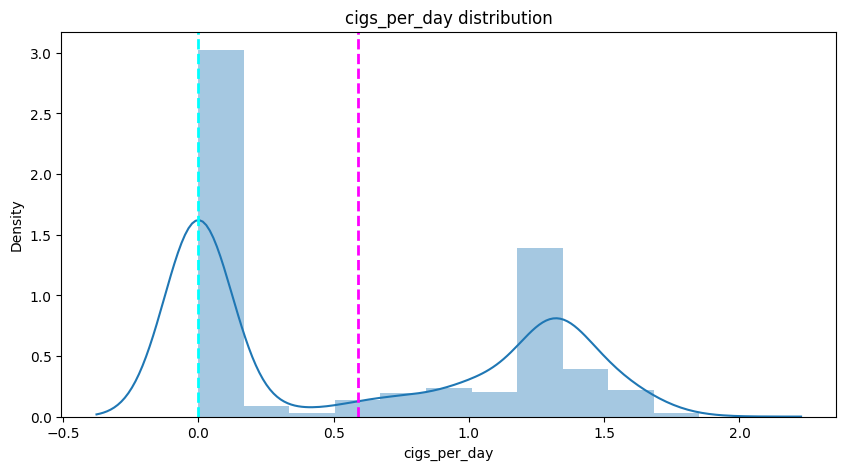

<ipython-input-53-cb809ee5e1af>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


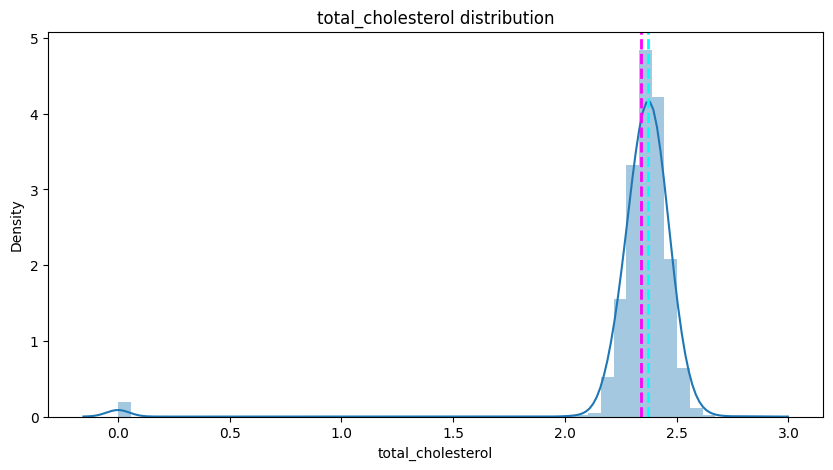

<ipython-input-53-cb809ee5e1af>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


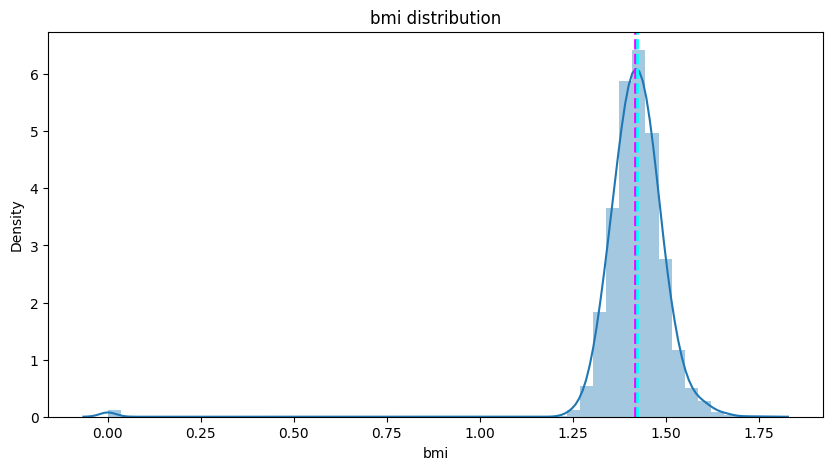

<ipython-input-53-cb809ee5e1af>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


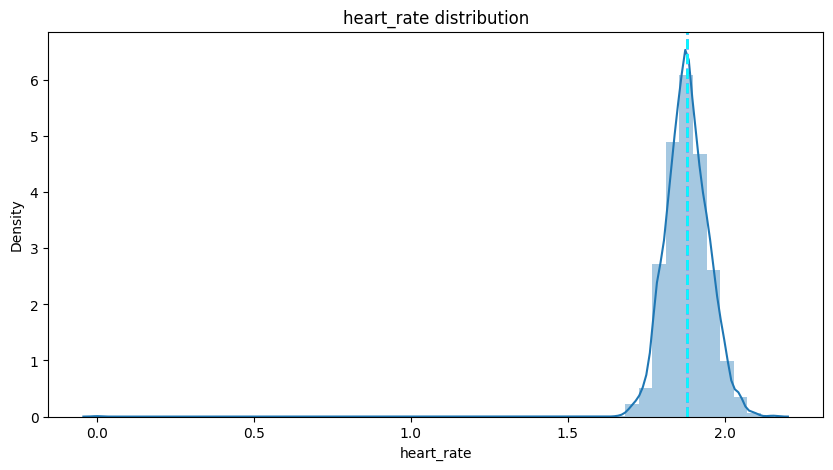

<ipython-input-53-cb809ee5e1af>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


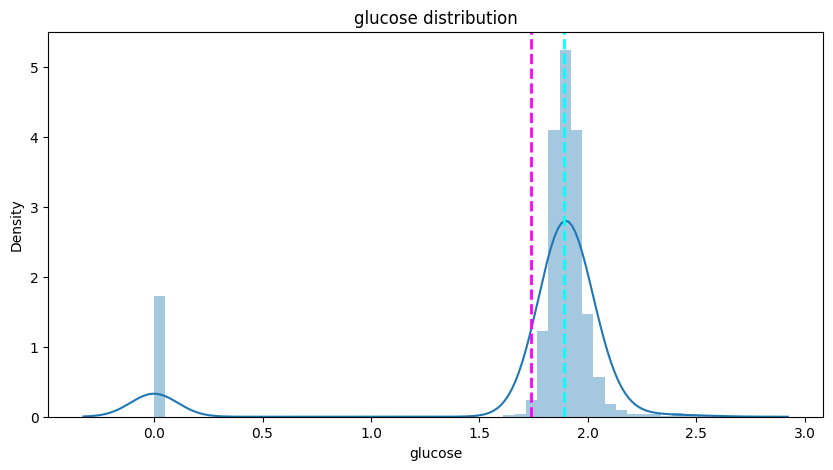

<ipython-input-53-cb809ee5e1af>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


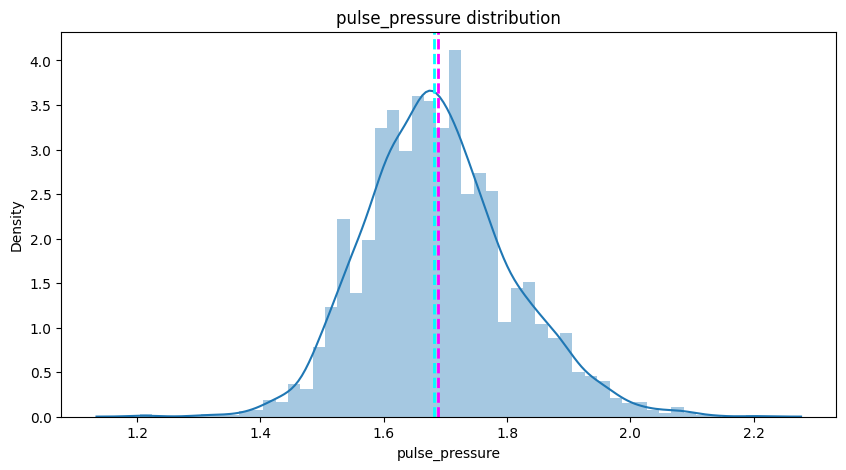

In [ ]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

Except cigs_per_day, we have successfully been able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.

### 6. Data Scaling

Samples in the original dataset 2373
Samples in the resampled dataset 4030


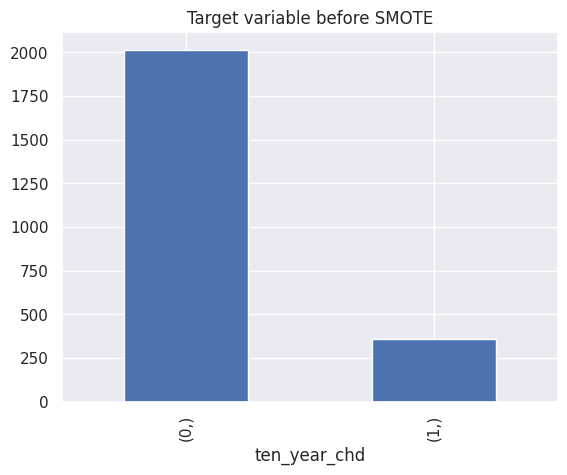

In [ ]:
# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

In [ ]:
# Scaling your data
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
# Scaled train values
X_train_scaled.head()

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,0.421853,1.352753,1.042877,1.126340,1.171992,-0.178155,-0.087426,-0.685091,-0.171759,0.266119,-0.544572,-0.271739,-0.448582,0.008708
1,-1.533156,0.238381,-0.929033,1.126340,1.438531,-0.178155,-0.087426,-0.685091,-0.171759,0.155712,0.790604,-0.457185,-0.872190,-0.066953
2,-1.404176,0.872536,-0.929033,1.126340,1.171992,-0.178155,-0.087426,-0.685091,-0.171759,0.686380,0.637144,-0.180913,1.109713,-0.386237
3,-1.045673,1.444209,-0.929033,-0.887831,-0.911595,-0.178155,-0.087426,1.459660,-0.171759,2.343171,0.432529,0.822317,1.256349,1.211142
4,0.239047,0.457551,-0.929033,-0.887831,1.171992,-0.178155,-0.087426,-0.685091,-0.171759,0.200147,-1.703519,-0.457185,-0.381337,0.008708


In [ ]:
# scaled SMOTE values
X_smote_scaled.head()

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,0.429059,1.218445,1.188028,1.316836,1.214371,-0.239196,-0.072376,-0.658911,-0.143218,0.191276,-0.653828,-0.317809,-0.507291,-0.191291
1,-1.550163,0.018317,-0.926366,1.316836,1.498937,-0.239196,-0.072376,-0.658911,-0.143218,0.075551,0.749010,-0.516547,-0.890070,-0.267248
2,-1.419585,0.701273,-0.926366,1.316836,1.214371,-0.239196,-0.072376,-0.658911,-0.143218,0.631779,0.587773,-0.220473,0.900811,-0.587780
3,-1.056642,1.316938,-0.926366,-0.759396,-1.010136,-0.239196,-0.072376,1.517656,-0.143218,2.368367,0.372789,0.854664,1.033313,1.015843
4,0.243989,0.254353,-0.926366,-0.759396,1.214371,-0.239196,-0.072376,-0.658911,-0.143218,0.122127,-1.871506,-0.516547,-0.446527,-0.191291


In [ ]:
# scaled test values
X_test_scaled.head()

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,-0.851009,-1.780908,0.130831,1.316836,1.214371,-0.239196,-0.072376,1.517656,-0.143218,0.371629,0.741868,0.426145,-1.164509,-0.759150
1,-0.498348,-0.748464,2.245225,1.316836,0.299029,-0.239196,-0.072376,1.517656,-0.143218,-0.236948,0.859971,-1.841078,0.173014,0.849628
2,-0.581629,-1.468132,0.130831,-0.759396,-1.010136,-0.239196,-0.072376,-0.658911,-0.143218,-1.384344,-1.379645,-0.516547,-0.154371,-0.384204
3,-0.288601,-0.353330,-0.926366,-0.759396,-1.010136,-0.239196,-0.072376,-0.658911,-0.143218,0.920845,0.417806,-0.317809,-0.268981,0.300612
4,1.331790,-0.885925,0.130831,-0.759396,1.498937,-0.239196,-0.072376,-0.658911,-0.143218,0.191276,-0.347440,-1.148203,-0.098136,-0.464289


##### Which method have you used to scale you data and why?

We have successfully scaled down the variables using standard scaler.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Defining dependent and independent variables
X = df.drop('ten_year_chd',axis=1)
y = df[dependent_var]

In [ ]:
# function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

ten_year_chd
0               2015
1                358
dtype: int64

In [ ]:
# Proportion of positive outcomes in train dataset
358/(358+2015)

0.15086388537715972

In [ ]:
# Checking the test distribution of dependent variable
y_test.value_counts()

ten_year_chd
0               864
1               153
dtype: int64

In [ ]:
# Proportion of positive outcomes in test dataset
153/(153+864)

0.1504424778761062

##### What data splitting ratio have you used and why? 

The train and test set contain almost equal proportion of results.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# imputing the outliers beyond 3 standard deviations from the mean with its median value
for i in ['total_cholesterol', 'bmi', 'heart_rate', 'glucose']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()

In [ ]:
X_train[continuous_var].skew(axis = 0)

age                 -0.035936
cigs_per_day         0.330724
total_cholesterol    0.064101
bmi                  0.338878
heart_rate           0.128675
glucose              2.592139
pulse_pressure       0.324104
dtype: float64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In order to create model pipeline, i append the default state of all classification algorithm,the model list and then iterate through to train, test, predict and evaluate.

those classification algorithms are:

1.Logistic Regression

2.Decision Tree

3.Random Forest

4.Support vector machine

5.K-Nearest Neighbour(KNN)

6.Naive Bayes

For classification task, there are varius metrics used for evaluation.

* Case 1: if a person has a disease but the model shows the person has no risk. for this case recall is the vest evaluation metric

* Case 2: if a person has no risk of disease but the model predicts the person has a risk. for this case, precision is the evaluation metric

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
#Logistic Regression
# Fitting model
lr_model = LogisticRegression()

In [ ]:
# training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [ ]:
# Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)

In [ ]:
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.7200992555831266

In [ ]:
lr_test_pred = lr_model.predict(X_test_scaled)


In [ ]:
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.5294117647058824

In [ ]:
# Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       864
           1       0.25      0.53      0.34       153

    accuracy                           0.69      1017
   macro avg       0.57      0.62      0.57      1017
weighted avg       0.80      0.69      0.73      1017



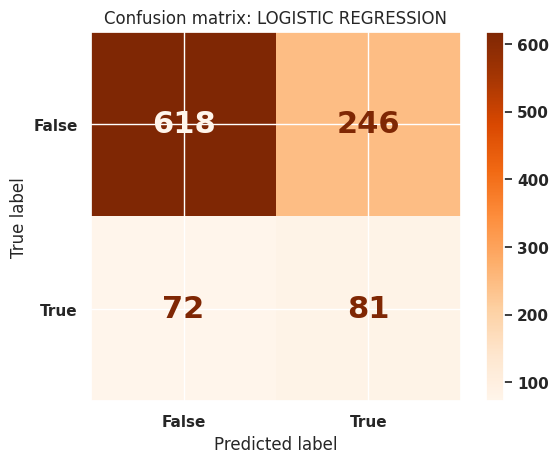

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Visualizing evaluation Metric Score chart
#K Nearest Neighbors:
# Value of k taken upto sqrt(n)
# Where n is no of records in the train dataset
# sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

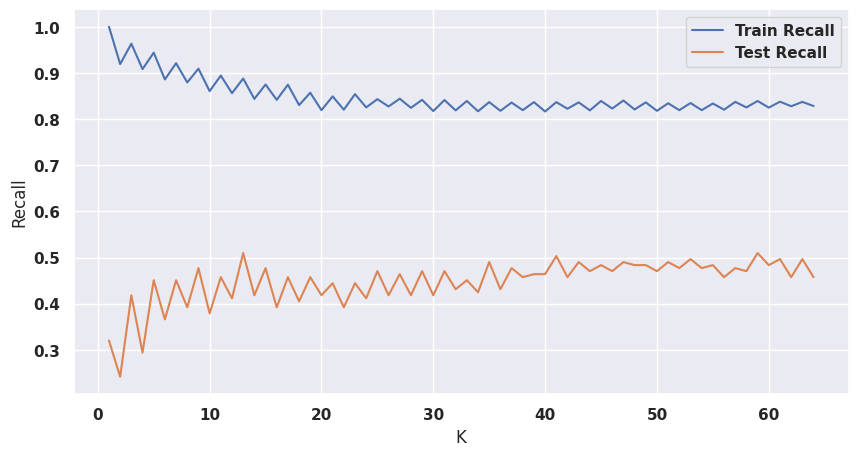

In [ ]:
# Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
# Best k is where the test recall is the highest
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

13

In [ ]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
# Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)

In [ ]:
# training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8878411910669975

In [ ]:
# Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)

In [ ]:
# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.5098039215686274

In [ ]:
# Classification report
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       864
           1       0.23      0.51      0.31       153

    accuracy                           0.67      1017
   macro avg       0.56      0.60      0.55      1017
weighted avg       0.79      0.67      0.71      1017



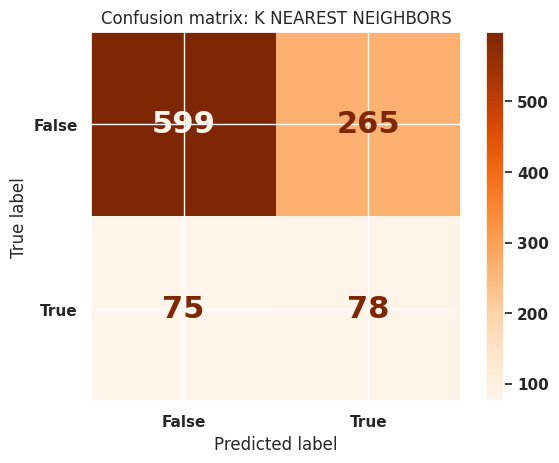

In [ ]:
# Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

False negatives obtained after using KNN: 75

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Using stratified k fold cross validation so that each split 
# has almost equal proportion of classification results
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3, 
                                    random_state=0)

In [ ]:
# Fitting model
nb_model = GaussianNB()

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [ ]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [ ]:
# model best parameters
nb_best_params

{'var_smoothing': 1.0}

In [ ]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [ ]:
# training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [ ]:
# Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)

In [ ]:
# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.5811414392059553

In [ ]:
# Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)

In [ ]:
# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.5294117647058824

In [ ]:
# Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       864
           1       0.28      0.53      0.37       153

    accuracy                           0.72      1017
   macro avg       0.59      0.64      0.60      1017
weighted avg       0.81      0.72      0.76      1017



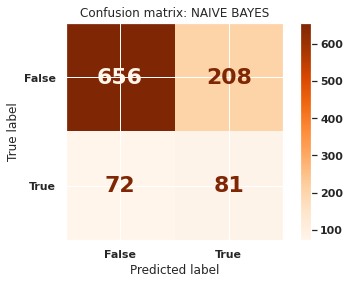

In [ ]:
# Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

**False negatives obtained after using Naive Bayes: 72**

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

### ML Model - 4

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [ ]:
# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
# model best parameters
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [ ]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [ ]:
# training the model 
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [ ]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)

In [ ]:
# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.8674937965260546

In [ ]:
# Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)

In [ ]:
# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7712418300653595

In [ ]:
# Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       864
           1       0.21      0.77      0.32       153

    accuracy                           0.52      1017
   macro avg       0.56      0.62      0.47      1017
weighted avg       0.81      0.52      0.58      1017



<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

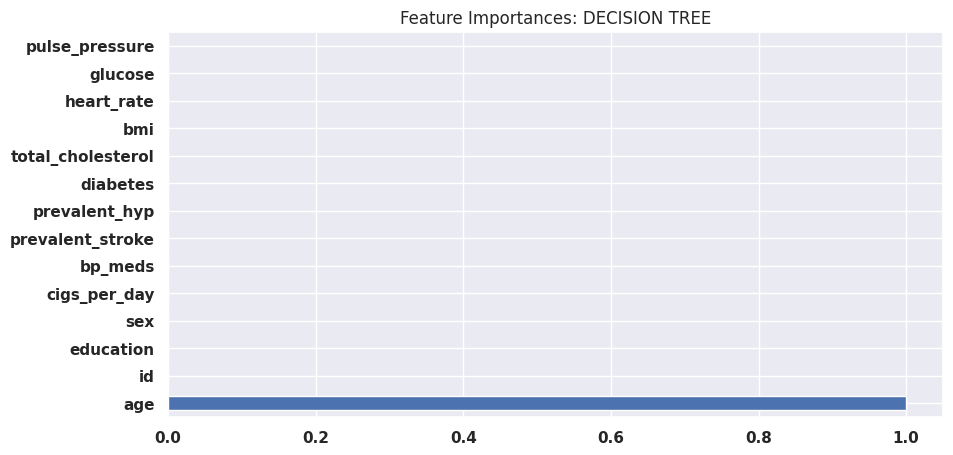

In [ ]:
# Feature importances

dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

**Only one feature (age) was given imporatance while fitting a decision tree model. This is because of max depth being 1.**

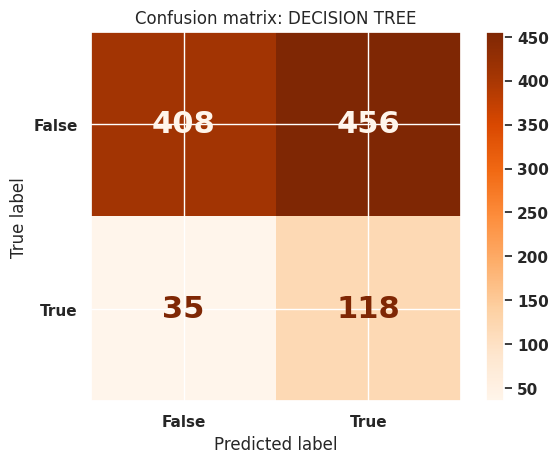

In [ ]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

**False negatives obtained after using decision tree: 35**

### ML Model - 5

In [ ]:
# SVM model parameters
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [ ]:
# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote_scaled,y_smote)
svm_best_params = svm_gridsearch.best_params_

In [ ]:
# model best parameters
svm_best_params

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [ ]:
# training the model 
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=1, gamma=0.01)

In [ ]:
# Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)

In [ ]:
# training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.7945409429280397

In [ ]:
# Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.5490196078431373

In [ ]:
# Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       864
           1       0.24      0.55      0.34       153

    accuracy                           0.68      1017
   macro avg       0.57      0.62      0.56      1017
weighted avg       0.80      0.68      0.72      1017



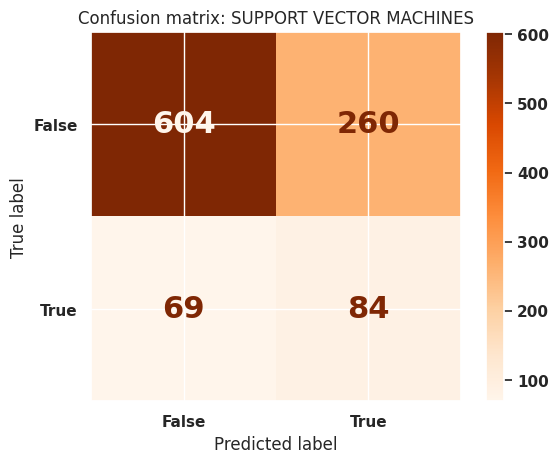

In [ ]:
# Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

**False negatives obtained after using SVM: 51**

### ML Model - 6

In [ ]:
# random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
# using gridsearchcv to find best parameters
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=cv_method,scoring='recall')
rf_gridsearch.fit(X_smote,y_smote)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
# best parameters for random forests
rf_best_params

{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
rf_model.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1,
                       n_estimators=500, random_state=0)

In [ ]:
# train predictions
rf_train_pred = rf_model.predict(X_smote)

In [ ]:
# train recall
rf_train_recall = recall(y_smote,rf_train_pred)
rf_train_recall

0.773697270471464

In [ ]:
# Test predictions
rf_test_pred = rf_model.predict(X_test)

In [ ]:
# test recall
rf_test_recall = recall(y_test,rf_test_pred)
rf_test_recall

0.6666666666666666

In [ ]:
# Classification report
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75       864
           1       0.25      0.67      0.36       153

    accuracy                           0.65      1017
   macro avg       0.58      0.65      0.56      1017
weighted avg       0.82      0.65      0.70      1017



<Axes: title={'center': 'Feature Importances: RANDOM FORESTS'}>

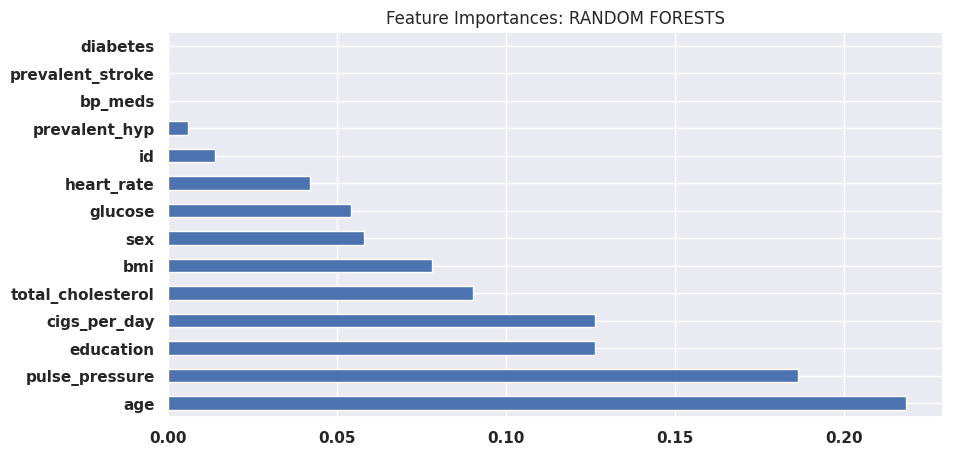

In [ ]:
# Feature importances

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

* **Features other than age are also given importance in this case insted of just one feature in case of decision tree.**
* **But age still remains the most important feature in predicting the final outcome for random forests.**

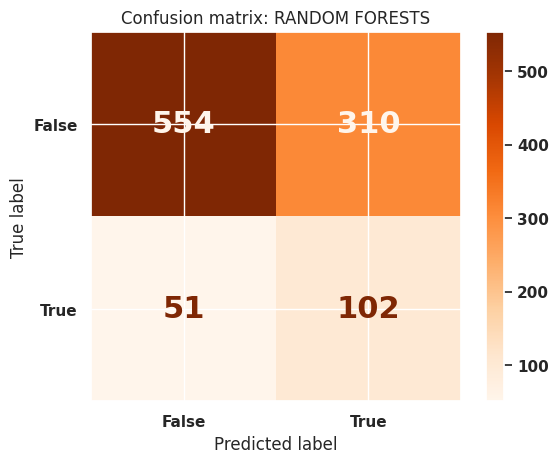

In [ ]:
# Confusion matrix
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: RANDOM FORESTS')
plt.show()

**False negatives obtained after using Random forests: 51**

### ML Model - 7

In [ ]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
# using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=cv_method,scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

[18:29:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[18:29:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[18:29:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[18:29:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[18:29:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[18:29:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[18:29:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[18:29:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[18:29:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

In [ ]:
# best parameters for xgboost classifier
xgb_best_params

{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
xgb_model.fit(X_smote_scaled,y_smote)

[18:35:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, min_samples_leaf=0.1,
              min_samples_split=0.1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [ ]:
# train recall
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

0.8034739454094293

In [ ]:
# Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [ ]:
# test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

0.23529411764705882

In [ ]:
# Classification report
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       864
           1       0.31      0.24      0.27       153

    accuracy                           0.81      1017
   macro avg       0.59      0.57      0.58      1017
weighted avg       0.79      0.81      0.80      1017



<Axes: title={'center': 'Feature Importances: XG BOOST'}>

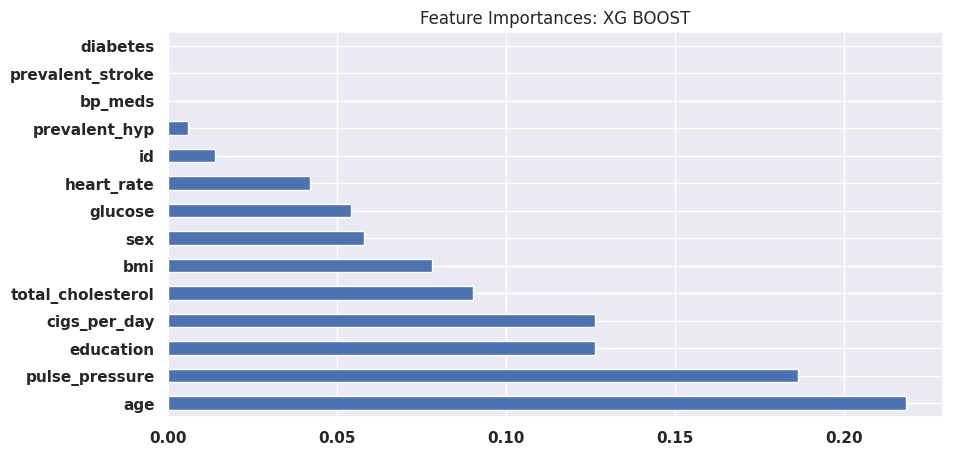

In [ ]:
# Feature importances

xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

* **Age in the most important feature in deciding the outcome of the variables for XG boost.**
* **Multiple features are given importance here rather than just one feature in case of decision tree.**

In [ ]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.87      0.91      0.89       864
    Positive       0.31      0.24      0.27       153

    accuracy                           0.81      1017
   macro avg       0.59      0.57      0.58      1017
weighted avg       0.79      0.81      0.80      1017



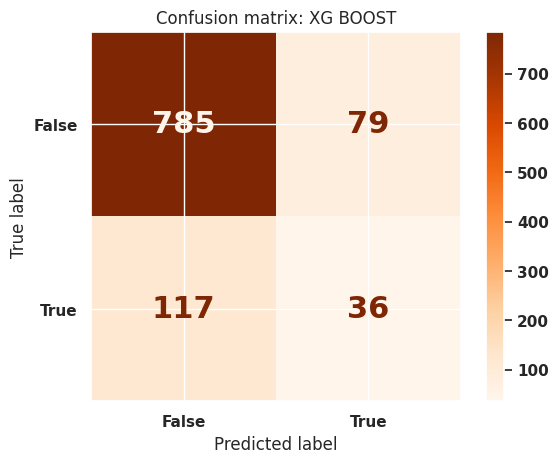

In [ ]:
# Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XG BOOST')
plt.show()

**False negatives obtained after using XG Boost: 117**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [ ]:
# Fitting model
nb_model = GaussianNB()

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [ ]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [ ]:
# model best parameters
nb_best_params

{'var_smoothing': 1.0}

In [ ]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [ ]:
# training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [ ]:
# Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)

In [ ]:
# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.6952853598014889

In [ ]:
# Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)

In [ ]:
# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.5751633986928104

In [ ]:
# Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74       864
           1       0.22      0.58      0.31       153

    accuracy                           0.62      1017
   macro avg       0.55      0.60      0.53      1017
weighted avg       0.79      0.62      0.67      1017



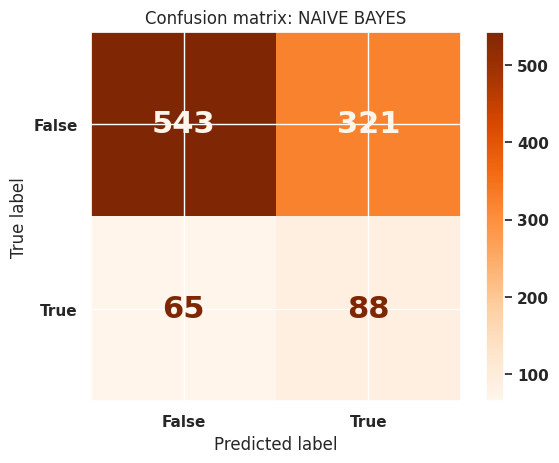

In [ ]:
# Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

**False negatives obtained after using Naive Bayes: 65**


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

The train and test recall scores obtained for different models built are as follows:

In [ ]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Classification Model', 'Train Recall (%)','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_train_recall*100,lr_test_recall*100])
test.add_row(['2','K Nearest Neighbors',knn_train_recall*100,knn_test_recall*100])
test.add_row(['3','Naive Bayes',nb_train_recall*100,nb_test_recall*100])
test.add_row(['4','Decision Tree',dt_train_recall*100,dt_test_recall*100])
test.add_row(['5','Support Vector Machines',svm_train_recall*100,svm_test_recall*100])
test.add_row(['6','Random Forests',rf_train_recall*100,rf_test_recall*100])
test.add_row(['7','XG Boost',xgb_train_recall*100,xgb_test_recall*100])
print(test)

+---------+-------------------------+-------------------+-------------------+
| Sl. No. |   Classification Model  |  Train Recall (%) |  Test Recall (%)  |
+---------+-------------------------+-------------------+-------------------+
|    1    |   Logistic Regression   | 69.87593052109182 |  67.3202614379085 |
|    2    |   K Nearest Neighbors   | 83.17617866004963 | 71.24183006535948 |
|    3    |       Naive Bayes       | 58.11414392059553 | 52.94117647058824 |
|    4    |      Decision Tree      | 85.95533498759306 | 77.12418300653596 |
|    5    | Support Vector Machines | 76.52605459057072 | 66.66666666666666 |
|    6    |      Random Forests     | 69.97518610421837 | 64.70588235294117 |
|    7    |         XG Boost        | 79.45409429280397 | 61.43790849673203 |
+---------+-------------------------+-------------------+-------------------+


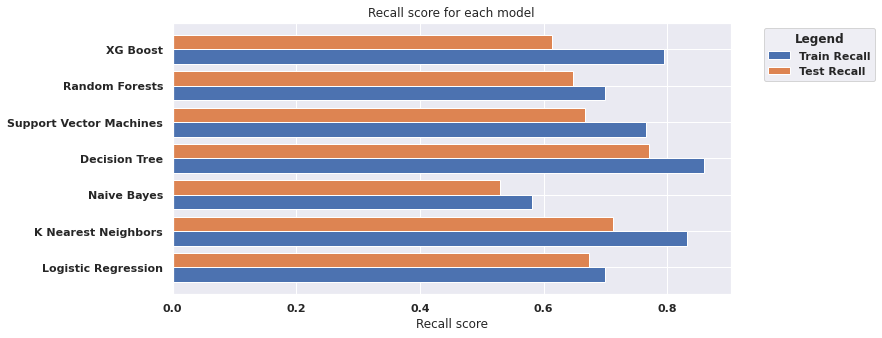

In [ ]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines','Random Forests','XG Boost']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,svm_train_recall,rf_train_recall,xgb_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,svm_test_recall,rf_test_recall,xgb_test_recall]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

* **The decision tree has the highest train and test recall score compared to other models built.**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

From exploratory Data analysis, we conclude that
* almost half of the patients have a habit of smoking

* Outliers present in continuous features except age column

* The patients who have more age, totalchol, sys_BP, dia_BP, BMI, Heartrate, Glucose are tending towards risk of coronary heart disease

* %8% of the females and 41% of males have no ris of CHD

* 46% of females 53% of males have risk of CHD

* 50% of the people who doesn't smoke have no risk of CHD

* 49% OF People who smoke have risk of CHD

* By fitting the data into various classification models and evaluating with test data, we can conclude that

For our problem statement, we have two cases

* case 1: if a person has a disease but the model shows the person has no risk, fo this case 'Recall' is the best evaluation metric

* case 2: if a person has no risk of disease but the models predicts the person has a risk of CHD, For this case, precision is the best evaluation metric

* Predicting the risk of coronary heart disease is critical for reducing fatalities caused by this illness. We can avert deaths by taking the required medications and precautions if we can foresee the danger of this sickness ahead of time.
* It is critical that the model we develop has a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high risk patient because it will not result in death, but if a high risk patient is incorrectly labelled as healthy, it may result in fatality.
* We were able to create a model with a recall of just 0.77 because of limitated data available and limited computational power availabe.
* A recall score of 0.77 indicates that out of 100 individuals with the illness, our model will be able to classify only 77 as high risk patients, while the remaining 33 will be misclassified.
* Future developments must include a strategy to improve the model recall score, enabling us to save even more lives from this disease. This includes involving more people in the study, and include people with different medical history, etc build an application with better recall score.

* From our analysis, it is also found that the age of a person was the most important feature in determining the risk of a patient getting infected with CHD, followed by pulse pressure, prevalent hypertension and total cholesterol.

* Diabetes, prevalent stroke and BP medication were the least important features in determining the risk of CHD.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***